<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 2 : Modèle de Drude</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

# Introduction # 
Cette deuxième partie du travail implémente une simulation 2D du modèle de Drude pour décrire le mouvement des électrons libres et indépendants dans les métaux. Des sphères dures sont encore utilisées pour représenter les particules, mais maintenant de deux types différents afin de différencier les coeurs ioniques immobiles des électrons sur leurs trajectoires balistiques. Les collisions entre les deux doivent donc être inélastiques. Les questions sur cette simulation, d'abord de cinétique puis de dynamique des électrons en présence d'une force externe appliquée au cristal, vérifieront quelques résultats analytiques du modèle de Drude obtenus en classe et/ou dans le manuel de cours Ashcroft/Mermin.

- **La remise du présent _Jupyter Notebook_ ET celui de la 1<sup>re</sup> partie, ainsi que tout autre fichier de code produit, se fait sur Gradescope en n'oubliant pas d'y indiquer tous les membres de votre équipe.**

# 2<sup>e</sup> partie - Modèle de Drude #

Faites une copie du script `TDS-2Dsimulation_HXX.py` et modifiez-le pour obtenir une simulation cinétique d'un gaz d'électrons libres dans la matière cristalline selon le modèle de Drude. Spécifiquement selon les pp.4-6 du manuel Ashcroft/Mermin,
1. ajoutez un deuxième type de sphères fixes réparties périodiquement dans la boîte d'animation: celles-ci représenteront les coeurs ioniques,
2. éliminez les collisions entre les sphères mobiles qui représentent maintenant les électrons de conduction indépendants et libres,
3. en faisant appel à la température du gaz, ajoutez des collisions inélastiques entre les électrons libres et les coeurs ioniques fixes. La quantité de mouvement $\vec{p}$ n'est alors PAS conservée et il faut appliquer les hypothèses spécifiques du modèle de Drude à la sortie de chaque collision, notamment: 
- la direction de $\vec{p}$ doit être aléatoire,
- la norme $||\vec{p}||$ est déterminée par la distribution de Maxwell-Boltzmann.

### Votre simulation ###

VII. _(25 points)_ &mdash; Écrivez un appel de votre nouveau script pour l'exécuter avec la cellule suivante:

In [1]:
# Les codes :
# TDS-2Dsimulation_H24_Part2_VII.py
# TDS-2Dsimulation_H24_Part2_IX_&_X.py

### Question statistique ###

VIII. _(5 points)_ &mdash; Vérifiez numériquement et graphiquement que l'amortissement de la quantité de mouvement moyenne des électrons suit l'équation exponentielle dérivée analytiquement en classe, soit $\langle p(t)\rangle =\langle p(t_0)\rangle \,e^{-t/\tau}$, et comparez-y le comportement d'un seul électron.

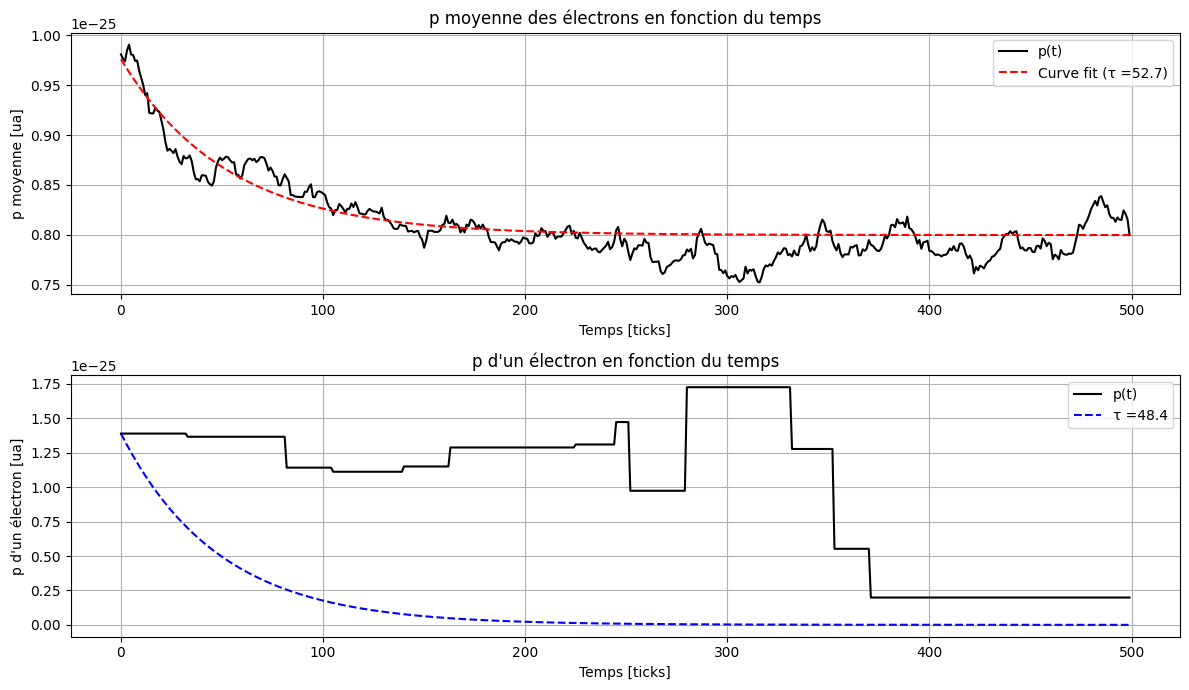

In [27]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def exponential_fit(t, p0, tau):
    '''
    Fonction pour retourner un exponentielle avec un taux d'amortissement tau.
    '''
    return p0 * np.exp(-t / tau) + liste_p_moyenne[-1]

#Exemples de données

#Quantité de mouvement moyenne
liste_p_moyenne = [9.810093781872559e-26, 9.767636423054743e-26, 9.739514271229792e-26, 9.849547669602894e-26, 9.906671957080452e-26, 9.807138702118641e-26, 9.804620021118181e-26, 9.744534638905665e-26, 9.747857985151455e-26, 9.64606711812015e-26, 9.574087707635856e-26, 9.50375506683712e-26, 9.401850136824938e-26, 9.420018640519061e-26, 9.222910789533524e-26, 9.217569840313563e-26, 9.217569840313563e-26, 9.271932945516628e-26, 9.24443296978669e-26, 9.233111257340669e-26, 9.146929166650325e-26, 9.055680488413098e-26, 8.930608099260898e-26, 8.842936531656218e-26, 8.861872320542836e-26, 8.841804539312137e-26, 8.818904850199164e-26, 8.858640693648519e-26, 8.78352517452868e-26, 8.73167849513642e-26, 8.707156589062468e-26, 8.790238200344815e-26, 8.765690292697114e-26, 8.770497702197353e-26, 8.795617536351725e-26, 8.739534624967327e-26, 8.630365332671284e-26, 8.557154021310012e-26, 8.557112353994967e-26, 8.535641167221489e-26, 8.596391736004592e-26, 8.595663175169404e-26, 8.59114721377136e-26, 8.531518927513315e-26, 8.507247628155719e-26, 8.492623718052667e-26, 8.53776705862344e-26, 8.674792696244168e-26, 8.735768840867133e-26, 8.773895718388869e-26, 8.747911306734039e-26, 8.76270265717461e-26, 8.783542697907153e-26, 8.776098625001471e-26, 8.74715137533469e-26, 8.72471572206016e-26, 8.72708313900424e-26, 8.601793161930406e-26, 8.601793161930406e-26, 8.563538041128213e-26, 8.59351565586683e-26, 8.696060876100389e-26, 8.732133565981404e-26, 8.761111696433682e-26, 8.76322136458787e-26, 8.747481079103647e-26, 8.761533548526597e-26, 8.727513618613611e-26, 8.747547936256955e-26, 8.778511795594704e-26, 8.778511795594704e-26, 8.767285932252243e-26, 8.711824200768844e-26, 8.643950292309434e-26, 8.672844665064563e-26, 8.640797960750021e-26, 8.58379187587404e-26, 8.582468572701729e-26, 8.495590994263512e-26, 8.495590994263512e-26, 8.558437045471843e-26, 8.605598820030581e-26, 8.571362389614099e-26, 8.53622720233305e-26, 8.397549693560232e-26, 8.398480282456869e-26, 8.383103136177531e-26, 8.381576331340378e-26, 8.379053445465562e-26, 8.376592279544959e-26, 8.378867915800828e-26, 8.43170213913888e-26, 8.430199520057866e-26, 8.477913499304604e-26, 8.5060357793337e-26, 8.376974156401703e-26, 8.376974156401703e-26, 8.426032730829068e-26, 8.435945762719177e-26, 8.428559040429326e-26, 8.41323652730229e-26, 8.398508576471825e-26, 8.32514257521095e-26, 8.27752762794981e-26, 8.262315823073692e-26, 8.196752943788844e-26, 8.245860036705996e-26, 8.248484703078487e-26, 8.309292675361669e-26, 8.287203809246358e-26, 8.258388208310753e-26, 8.222253369748318e-26, 8.25928349639233e-26, 8.25928349639233e-26, 8.312770705745621e-26, 8.277990100228175e-26, 8.327336406057546e-26, 8.276627947360534e-26, 8.213813907638149e-26, 8.21064248293591e-26, 8.20284453483735e-26, 8.203737636090991e-26, 8.238674145399706e-26, 8.259164525214474e-26, 8.242485427375027e-26, 8.232511621135846e-26, 8.232511621135846e-26, 8.223184915327046e-26, 8.212502558192817e-26, 8.271268706939697e-26, 8.180499906803513e-26, 8.148507335168259e-26, 8.148948941394952e-26, 8.126563519005083e-26, 8.09791286669003e-26, 8.061973384606889e-26, 8.05787670188258e-26, 8.060187260335066e-26, 8.10254225736106e-26, 8.093145725067622e-26, 8.08863764405431e-26, 8.08863764405431e-26, 8.031783047494865e-26, 8.035619693592363e-26, 8.03822269508339e-26, 8.023277288077803e-26, 8.034094723041887e-26, 8.037857211363952e-26, 7.980443845825225e-26, 7.95118673987219e-26, 7.868856234559263e-26, 7.935858032191311e-26, 8.039962317437961e-26, 8.039962317437961e-26, 8.039277304990124e-26, 8.028125671097859e-26, 8.028125671097859e-26, 8.029329943684976e-26, 8.04610015821075e-26, 8.098053849812785e-26, 8.107418164099249e-26, 8.190241390711879e-26, 8.119382750015351e-26, 8.116300744483917e-26, 8.150365524016172e-26, 8.097506969326965e-26, 8.108256968585664e-26, 8.088325557643865e-26, 8.023147648280938e-26, 8.057919591632346e-26, 8.022021851347048e-26, 8.101707965791655e-26, 8.085992044205388e-26, 8.150411403783097e-26, 8.141399467641215e-26, 8.112633344297521e-26, 8.062495140759907e-26, 8.096519447939687e-26, 8.060996611693203e-26, 8.101390649108987e-26, 8.062288335277604e-26, 8.055927966785696e-26, 7.976741883766771e-26, 7.925813367751815e-26, 7.925813367751815e-26, 7.922013447957335e-26, 7.884770311980265e-26, 7.843532001579585e-26, 7.90818155548118e-26, 7.92516103961831e-26, 7.92516103961831e-26, 7.955197046903596e-26, 7.934929174623841e-26, 7.953255761929788e-26, 7.942533188101002e-26, 7.929036774502523e-26, 7.929036774502523e-26, 7.908774480749276e-26, 7.933539808996481e-26, 7.973144891884136e-26, 7.961556123559891e-26, 7.958913397359522e-26, 7.913758962985296e-26, 7.912097796247068e-26, 7.923839287128398e-26, 8.014751334221719e-26, 7.986126880010911e-26, 7.995209655142972e-26, 8.06519328204571e-26, 8.038169768355006e-26, 8.036050479854163e-26, 7.978484856814927e-26, 8.008347088280238e-26, 8.02639845335624e-26, 8.01055614062239e-26, 7.959057757988699e-26, 7.981230137740382e-26, 7.981230137740382e-26, 7.981624487626574e-26, 8.01469745420088e-26, 8.047131317576411e-26, 8.081147970028026e-26, 8.089749090380211e-26, 8.00767264131442e-26, 8.039056755762297e-26, 7.968852258585729e-26, 7.962523648691507e-26, 8.018821291263388e-26, 7.966617721776824e-26, 7.91904582781547e-26, 7.891051251069847e-26, 7.858570722119375e-26, 7.873416253994615e-26, 7.846392417135381e-26, 7.858365541020211e-26, 7.86171284881806e-26, 7.829772218462672e-26, 7.822927121178756e-26, 7.847132121097149e-26, 7.868809661861246e-26, 7.88953896714205e-26, 7.929022819694786e-26, 7.853995361188855e-26, 7.874781275729416e-26, 7.929971471231936e-26, 8.042987810550216e-26, 8.077628380738107e-26, 7.954619715570944e-26, 7.884049430508593e-26, 7.959106937915187e-26, 7.926658141781418e-26, 7.827148148663367e-26, 7.745574039910105e-26, 7.810464077448227e-26, 7.86299584088538e-26, 7.852921412591206e-26, 7.89374462381793e-26, 7.89374462381793e-26, 7.890274039464138e-26, 7.958346807391369e-26, 7.91923552569714e-26, 7.91923552569714e-26, 7.773757487872618e-26, 7.724209452341372e-26, 7.727992298099721e-26, 7.727992298099721e-26, 7.733210537574172e-26, 7.635110315870212e-26, 7.605299940392832e-26, 7.620885484901823e-26, 7.673528048968763e-26, 7.687563114930392e-26, 7.700034341243604e-26, 7.725642145879987e-26, 7.741338901213027e-26, 7.741338901213027e-26, 7.738130426408373e-26, 7.751522782236721e-26, 7.791587765171553e-26, 7.795201473607658e-26, 7.851204657476005e-26, 7.831760390392206e-26, 7.858290867286633e-26, 7.763230438724522e-26, 7.795490408157243e-26, 7.967588461018831e-26, 8.011827963317404e-26, 8.058194830893503e-26, 7.987507039614995e-26, 7.918373201385372e-26, 7.895666280932219e-26, 7.910170075636976e-26, 7.903300362405295e-26, 7.895628804110386e-26, 7.808991891126287e-26, 7.804748034256791e-26, 7.647169377683954e-26, 7.64469081342499e-26, 7.613980523678128e-26, 7.641563273805533e-26, 7.584214405853914e-26, 7.561285054460508e-26, 7.584128536980601e-26, 7.575262106331922e-26, 7.596234127686681e-26, 7.552163835526982e-26, 7.524644479015037e-26, 7.543294250793111e-26, 7.559327482787234e-26, 7.678702855469326e-26, 7.61143545271625e-26, 7.647349209977168e-26, 7.639454479810665e-26, 7.652709855511794e-26, 7.584472024068335e-26, 7.529568274772126e-26, 7.521722441436714e-26, 7.576892284813052e-26, 7.655743709824482e-26, 7.691153020248407e-26, 7.683011981212335e-26, 7.702574423235944e-26, 7.688785584476561e-26, 7.736171507068471e-26, 7.771401701329111e-26, 7.821500437688371e-26, 7.803650814220552e-26, 7.829365944986616e-26, 7.863956890662453e-26, 7.860111397428366e-26, 7.794663034332548e-26, 7.805940956698893e-26, 7.781403968198536e-26, 7.84061418649344e-26, 7.80126941983889e-26, 7.792928973799405e-26, 7.883065357375099e-26, 7.89245097935353e-26, 7.931501720966069e-26, 8.000659453299622e-26, 7.90390665324096e-26, 7.833687004134931e-26, 7.873232566130668e-26, 7.843481594829101e-26, 7.885197493658591e-26, 8.011558460425269e-26, 8.094747225995946e-26, 8.151674720589345e-26, 8.119469049022037e-26, 8.037443073497486e-26, 8.027808397994466e-26, 8.040536671931172e-26, 7.937832156162662e-26, 7.881125156363447e-26, 7.842956161636458e-26, 7.907547151080186e-26, 7.814457687492333e-26, 7.774306124787425e-26, 7.802663139877966e-26, 7.802663139877966e-26, 7.801919893734149e-26, 7.878610671488696e-26, 7.870283439070065e-26, 7.888063958271298e-26, 7.89459724509208e-26, 7.791937345140146e-26, 7.793672582580224e-26, 7.853338235771816e-26, 7.837869434712386e-26, 7.862022243446237e-26, 7.945393759455269e-26, 7.897916922498789e-26, 7.888719716266386e-26, 7.864731873092913e-26, 7.840310707496884e-26, 7.835326625956358e-26, 7.856005738626303e-26, 7.914885229614345e-26, 7.988368040748105e-26, 7.962193182313608e-26, 7.999634640540206e-26, 8.095716772443887e-26, 8.099613095367516e-26, 8.074724348658687e-26, 8.156593005490836e-26, 8.114757799690605e-26, 8.114757799690605e-26, 8.123426467011803e-26, 8.077089701437694e-26, 8.181277574323813e-26, 8.066818181880687e-26, 8.054438685330875e-26, 8.025732771026204e-26, 7.982359108270434e-26, 7.91011045797383e-26, 7.94891828137996e-26, 7.858808672702726e-26, 7.92426875555231e-26, 7.928169897957192e-26, 7.939698185199378e-26, 7.835845419422494e-26, 7.835845419422494e-26, 7.817255395032712e-26, 7.794534567165407e-26, 7.801734742716285e-26, 7.795085738473882e-26, 7.780809878145043e-26, 7.797631308660788e-26, 7.797631308660788e-26, 7.815454435190714e-26, 7.861849838759583e-26, 7.84334045770765e-26, 7.885748255128529e-26, 7.841509694410467e-26, 7.837412293637607e-26, 7.90873808519576e-26, 7.912236666815181e-26, 7.878488466743633e-26, 7.805852564677866e-26, 7.76328296327032e-26, 7.790343252156141e-26, 7.746943572575749e-26, 7.610966318565229e-26, 7.676039543426171e-26, 7.642034363310268e-26, 7.688739930527939e-26, 7.67840803115036e-26, 7.661591951306704e-26, 7.706342700764416e-26, 7.730519073791408e-26, 7.742387503965166e-26, 7.779924441898507e-26, 7.786244043601273e-26, 7.813525938435532e-26, 7.839630617005343e-26, 7.858669356453514e-26, 7.955711317508167e-26, 7.986981050236637e-26, 8.007916556360374e-26, 8.00674945752907e-26, 8.035063802199387e-26, 8.01091486587058e-26, 8.027135375118551e-26, 8.034857629047291e-26, 7.935179714027319e-26, 7.8608349904546e-26, 7.872340510272395e-26, 7.845606118319112e-26, 7.840793464509472e-26, 7.865976459049229e-26, 7.865976459049229e-26, 7.827685432779056e-26, 7.825856910752891e-26, 7.885329578016154e-26, 7.88941080222587e-26, 7.860625620317594e-26, 7.962296049934924e-26, 7.938227545303132e-26, 7.88490748172964e-26, 7.918199356690604e-26, 7.905737477221806e-26, 7.753607866045568e-26, 7.799830270425978e-26, 7.785028421248322e-26, 7.753202711060891e-26, 7.84626783131381e-26, 7.811760409932656e-26, 7.801064662289669e-26, 7.798402777802168e-26, 7.809941592339419e-26, 7.808182732082793e-26, 7.819987771844567e-26, 7.906862271136042e-26, 7.992693543466035e-26, 8.099888915814623e-26, 8.090387471771828e-26, 8.058836015659351e-26, 8.109445310258875e-26, 8.144344828585495e-26, 8.19642923736377e-26, 8.25869362430831e-26, 8.299299740184525e-26, 8.339005384952617e-26, 8.292782511682442e-26, 8.374337530145311e-26, 8.387310912617781e-26, 8.327635288711197e-26, 8.276394225063327e-26, 8.29453048626784e-26, 8.204427936204354e-26, 8.168743816220676e-26, 8.168743816220676e-26, 8.129851332589803e-26, 8.172758512180506e-26, 8.150210444873794e-26, 8.148831462583958e-26, 8.243371053461481e-26, 8.210471349274191e-26, 8.153638855948263e-26, 7.996237232509005e-26]
#Quantité de mouvement d'un électron
liste_p_electron = [1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3892987458058693e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.3662416079604072e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.141859211743673e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1120246833346432e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.1502208054711401e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.2883823882684107e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.3100499435751134e-25, 1.4728739258673996e-25, 1.4728739258673996e-25, 1.4728739258673996e-25, 1.4728739258673996e-25, 1.4728739258673996e-25, 1.4728739258673996e-25, 1.4728739258673996e-25, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 9.738678642687839e-26, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.7260672902743393e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 1.2773960540872443e-25, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 5.524017760114913e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26, 1.984624689341022e-26]
# Nombre de ticks moyen entre chaque collision 
tau_moyen = 48.4


# Curve fiting exponentielle
t_data = np.arange(0,500, 1) 
popt, pcov = curve_fit(exponential_fit, t_data, liste_p_moyenne, p0=(liste_p_moyenne[0], 1.0))
p0_fit, tau_fit = popt
p_fit = exponential_fit(t_data, p0_fit, tau_fit)


plt.figure(figsize=(12,7))

# Graphique p(t) moyen
plt.subplot(2,1,1)
plt.plot(t_data, liste_p_moyenne, label='p(t)', color='black')
plt.plot(t_data, p_fit, label=f'Curve fit (τ ={(tau_fit):.1f})', color='red', linestyle='--')
plt.xlabel('Temps [ticks]')
plt.ylabel('p moyenne [ua]')
plt.title('p moyenne des électrons en fonction du temps')
plt.legend()
plt.grid(True)

# Graphique p(t) pour un seul électron
plt.subplot(2,1,2)
plt.plot(t_data, liste_p_electron, label='p(t)', color='black')
plt.plot(t_data, (liste_p_electron[0] * np.exp(- t_data / tau_moyen)), label=f"τ ={(tau_moyen):.1f}", color='blue', linestyle='--')
plt.xlabel('Temps [ticks]')
plt.ylabel("p d'un électron [ua]")
plt.title("p d'un électron en fonction du temps")
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()

Pour la quantité de mouvement moyenne, on observe une légère décroissance de la quantité de mouvement en fonction du temps. À l'aide d'un curve fit (courbe rouge), on voit que cette décroissance suit le comportement d'une exponentielle avec un taux d'amortissement $\tau = 52,7$. La seule différence avec le modèle analytique est l'ajout d'une constante dans la formule, car en gardant la température constante, la quantité de mouvement moyenne du système ne tend pas vers 0.\\

Pour ce qui est du comportement d'un seul électron, on remarque un comportement assez aléatoire. En effet, puisqu'à chaque collision sa quantité de mouvement est redéfini aléatoirement selon la distribution de maxwell, celle-ci peut varier énormément et ne pas avoir de comportement précis. La courbe bleue représente l'équation $p(t) = p(t_0) e^{-t/\tau}$ avec la quantité de mouvement initiale de cet électron et son temps de collision moyen $\tau = 48.4$ (nombre de ticks moyen entre chaque collision). Cet équation ne suit pas le comportement de l'électron, mais on remarque que son $\tau$ est très similaire et de le même ordre de grandeur à celui du de la moyenne du système.

### Dynamique sous l'effet d'une force externe ###

IX. _(10 points)_ &mdash; Pour passer de la cinétique à la dynamique des électrons libres, modifiez votre code de simulation en ajoutant une fonction qui applique un champ électrique uniforme. Celui-ci devra être de module ajustable et perpendiculaire à deux des côtés de la boîte. À chaque pas de temps $\mathrm{d}t$ sans collision, les électrons devront donc accélérer d'un incrément $\mathrm{d}p_x$ dicté par la force de Coulomb à leur position.

Copiez le code de votre fonction dans la cellule qui suit en n'oubliant pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [3]:
# Définir les variables: ligne 33
E = 0.2
q = -1.602e-19

# Application dans la boucle: ligne 116 à 122 (commenté pour éviter le crash)


# for i in range(Natoms):
#     vitesse.append(p[i]/mass)   # par définition de la quantité de nouvement pour chaque sphère
#     # Ajout du champ E uniforme de module ajustable
#     dv = vector(E*q*dt/mass,0,0) <--------------------------------------- ici
#     deltax.append(vitesse[i] * dt + dv * dt) # Le champ E affecte le deltax (dv*dt = deltax supplémentaire)
#     Atoms[i].pos = apos[i] = apos[i] + deltax[i]  # nouvelle position de l'atome après l'incrément de temps dt
#     p[i] += dv*mass # On ajoute aussi l'effet du champ sur la quantité de mouvement <--------------------------------------- et ici

### Question statistique ###

X. _(5 points)_ &mdash; Pour quelques différents modules de champ électrique, présentez graphiquement l'évolution de la position moyenne des électrons en fonction du temps pour ses deux composantes parallèle et perpendiculaire au champ.

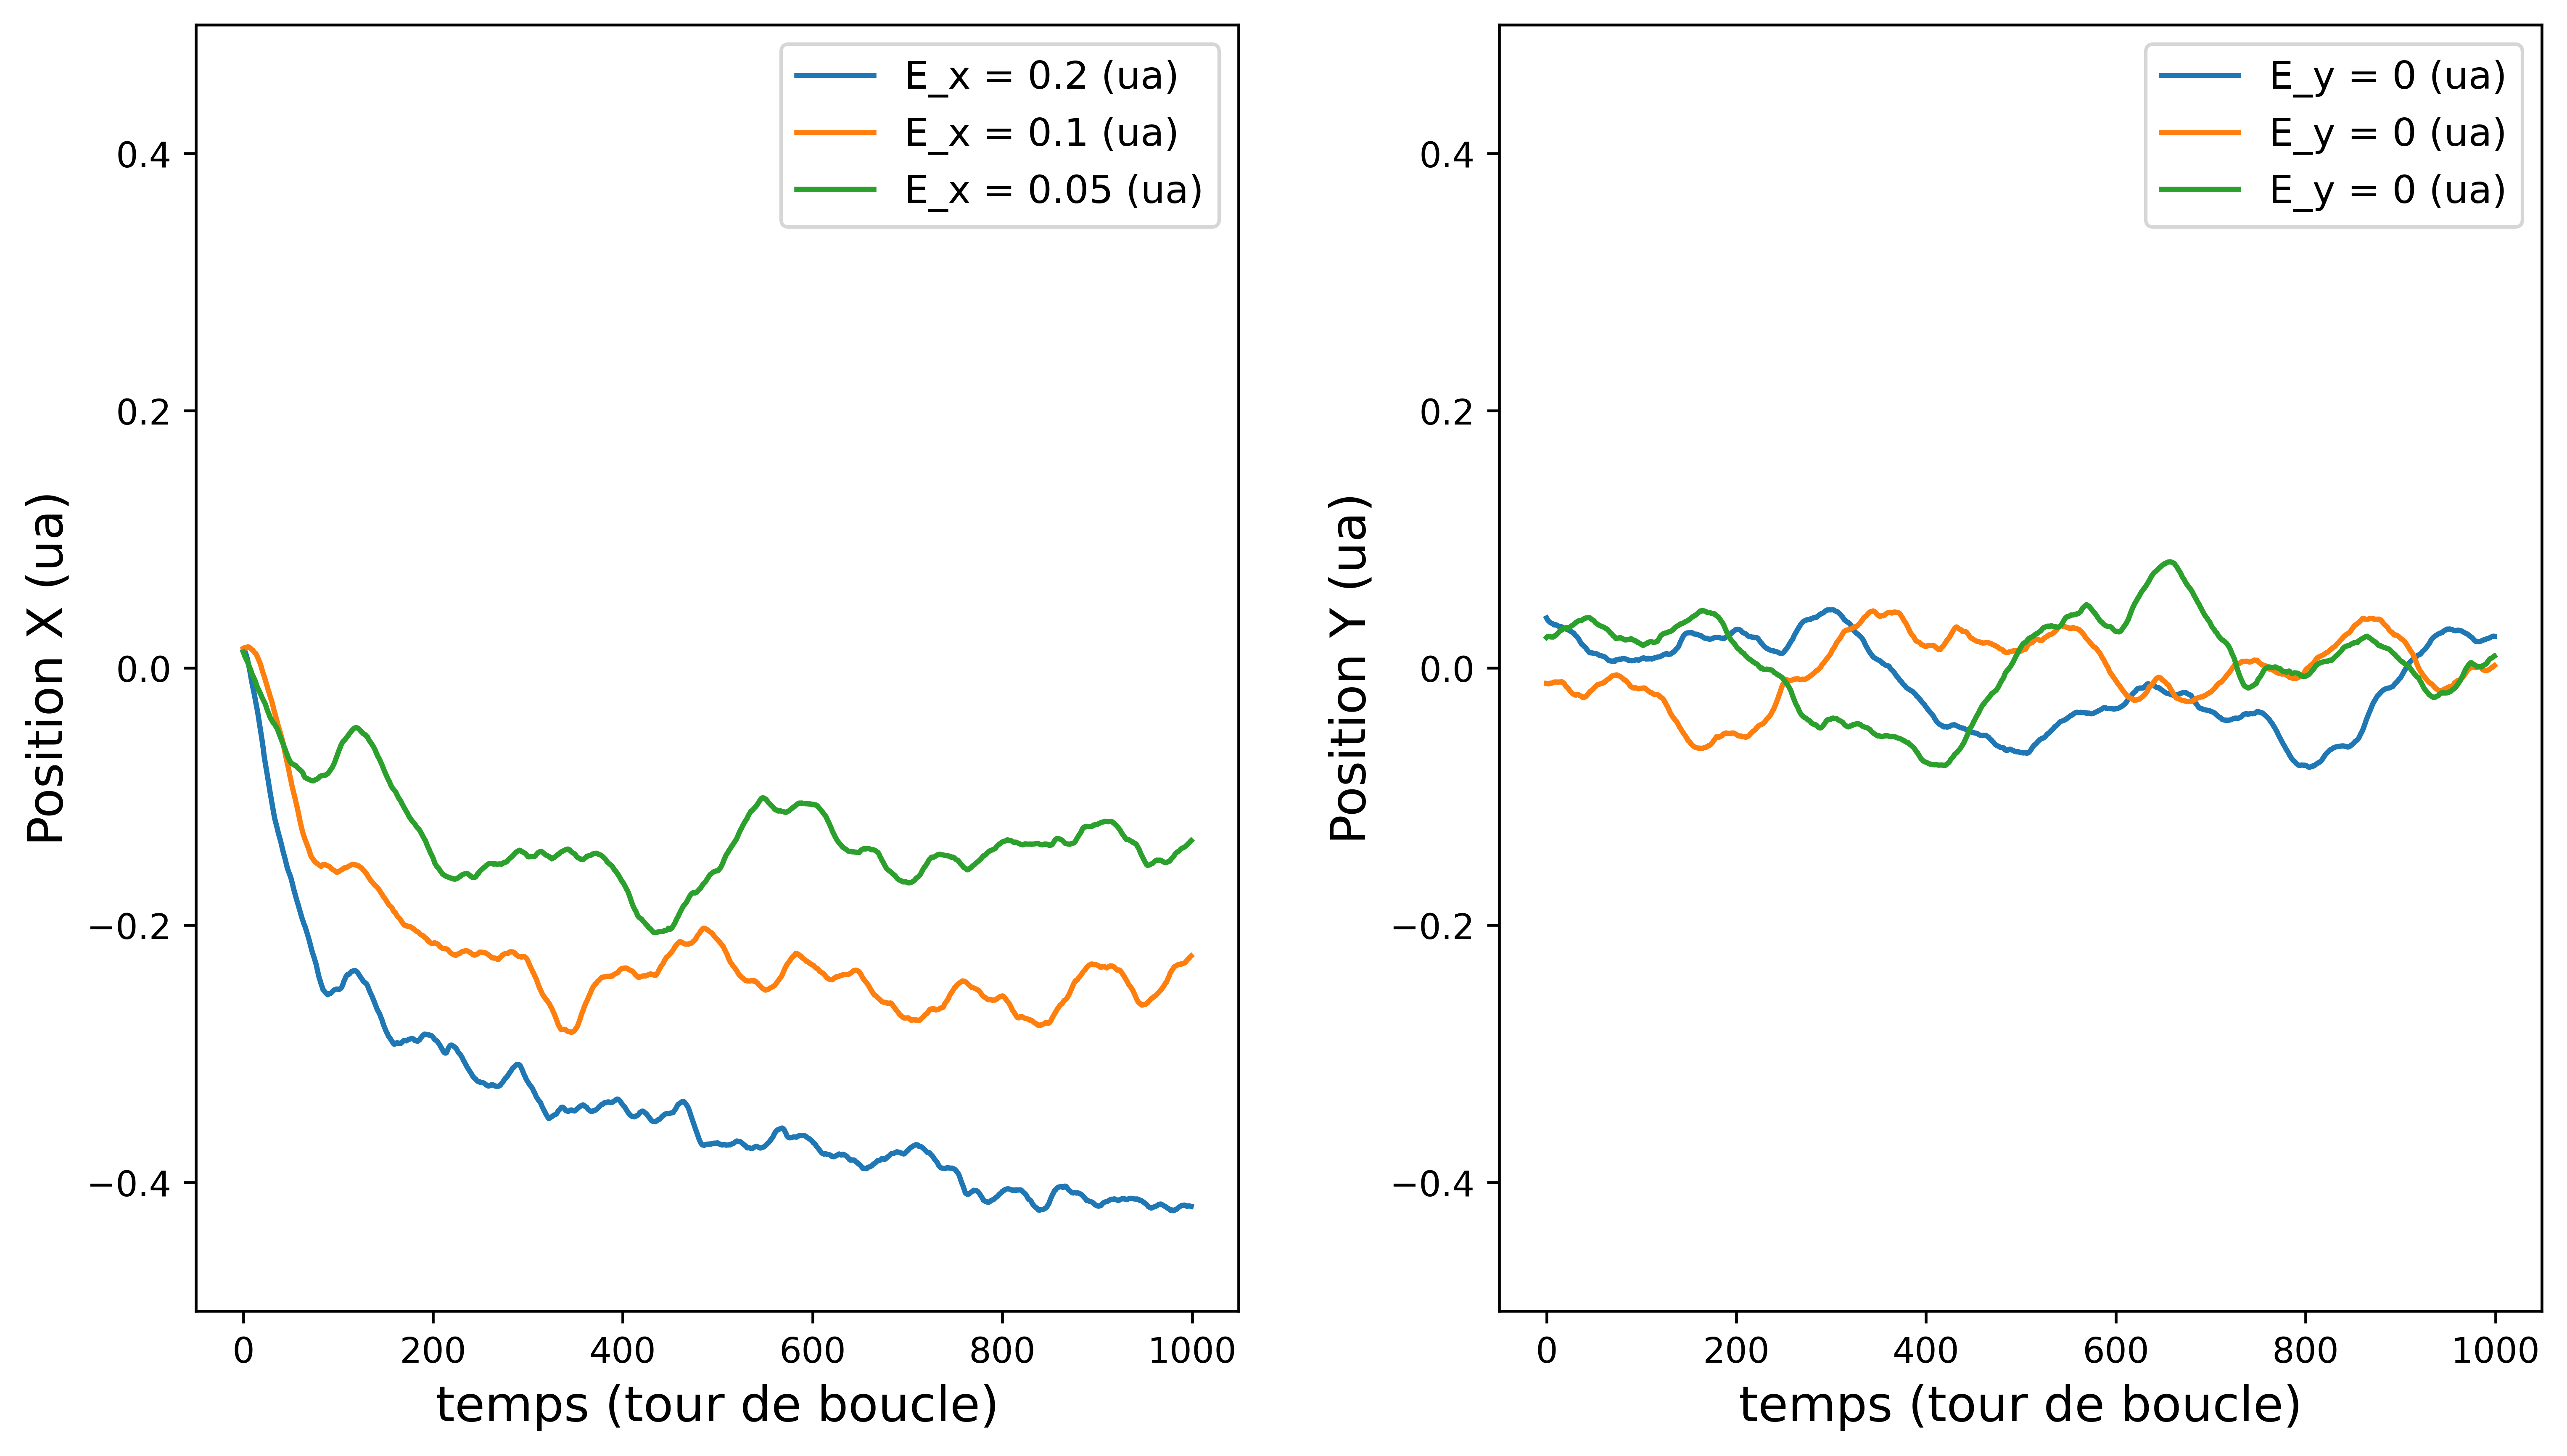

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple de réponse possible

#Valeur du champ E = 0.2
meanPos1 = [(0.014129108608228818, 0.03891326229593938), (0.013838301553624009, 0.037539963186728524), (0.012533800070137215, 0.036599885016961944), (0.010276679623826961, 0.03593742362968161), (0.007634068703100634, 0.03533465282187649), (0.004507188124589766, 0.034870994580168464), (0.0010346467674576193, 0.03465009504020312), (-0.0027782112289130843, 0.034101544178417535), (-0.006888133451737769, 0.03353703633735652), (-0.011164745465628479, 0.03377974022395325), (-0.014855788572380142, 0.03362764691812872), (-0.01826486230219572, 0.03308999651845798), (-0.021973731212136825, 0.03282705168533214), (-0.026123840246175877, 0.032285695136931476), (-0.02996824683421408, 0.03248952312608035), (-0.03370979476011845, 0.03206900080052013), (-0.03838873704364339, 0.031990074219775476), (-0.042949780135114676, 0.03170128494527196), (-0.0477208151336315, 0.031107110461061006), (-0.05230761601190161, 0.031014849474060736), (-0.057311239587485116, 0.030387401343321012), (-0.06266988363934799, 0.030281932638313424), (-0.06871241278788194, 0.029865245078681713), (-0.07329718135731592, 0.02960189618858822), (-0.07771988720579122, 0.029189069598211752), (-0.08190660365363574, 0.02865354485971825), (-0.0865854733653283, 0.0283756950443001), (-0.09104551574738222, 0.02773348591417222), (-0.09565852729836437, 0.02744468991717721), (-0.10001550344866042, 0.026917015638483734), (-0.10425362389987555, 0.025582186500791707), (-0.10849089912168969, 0.025021603238173092), (-0.11266267674386972, 0.024435534168838965), (-0.11671646080865855, 0.02327987497034551), (-0.1196184095034512, 0.02239796071319424), (-0.12265966912018303, 0.02092114702363122), (-0.12541749472948155, 0.0198128772457116), (-0.1285865908651051, 0.018495839048568847), (-0.1310953011930229, 0.018059326893083448), (-0.13371206619675888, 0.01726645771827186), (-0.13660270801709187, 0.01654273258872155), (-0.1399022022389389, 0.01598415120923155), (-0.1429353292906631, 0.01484629094856529), (-0.14560727716082394, 0.013894875211910384), (-0.14828369589281798, 0.012996977022252226), (-0.15131185466213773, 0.01209907883259407), (-0.1543333896623694, 0.011786008269823489), (-0.15688622643929517, 0.01198856328761311), (-0.15879246922790782, 0.011658849738634973), (-0.16075051222400458, 0.01161359054489712), (-0.1626881604347186, 0.011394068517567002), (-0.16550643057166284, 0.011279524146664216), (-0.168415464025785, 0.011335257149512033), (-0.17167683184868218, 0.010989914986630187), (-0.17422065174295598, 0.010598657871662899), (-0.17698099798270245, 0.010086929019141145), (-0.1797173029486175, 0.009775424778472723), (-0.18212640785311338, 0.009629280670042532), (-0.1844903439905916, 0.009441052408596586), (-0.18717913456970992, 0.009318449968762967), (-0.18971388423630942, 0.008953152702016772), (-0.19235541496163186, 0.00876078997034246), (-0.19482846781321914, 0.00837399739759238), (-0.1969158854372529, 0.007516655174506348), (-0.19916000514580834, 0.006943876566486131), (-0.20086111392242095, 0.006061475812386002), (-0.2031897324728271, 0.005839606434947178), (-0.20557169718038068, 0.005549358489894054), (-0.20806335113336372, 0.0054655897816290235), (-0.21049566967834696, 0.005185716845071749), (-0.21323390368105444, 0.0054850397408456285), (-0.21621325626056173, 0.005343850669266665), (-0.21905194606028733, 0.005234528682423425), (-0.2215377887105383, 0.006349237380631607), (-0.22371654094938404, 0.0062546952824936355), (-0.22609827809227087, 0.006493698103930734), (-0.22844293732512766, 0.006748082755654596), (-0.2310397872672934, 0.006987518241250641), (-0.23466491233527864, 0.006692709195034681), (-0.23781868975493492, 0.006955909336838302), (-0.24095850183167497, 0.007559520293099966), (-0.2430750988799364, 0.00739209032403936), (-0.2456150717265549, 0.007171453562962644), (-0.24768030165623756, 0.007163562268050134), (-0.2500670062699555, 0.006877852260121846), (-0.2507708487907213, 0.006629210318129326), (-0.2518212193317861, 0.006024224494238122), (-0.2526155704570654, 0.006092781757751337), (-0.25339530838551527, 0.005828080067169181), (-0.25403874196709947, 0.005713643272329268), (-0.2533801052561408, 0.005628733462756365), (-0.25290909084563773, 0.005971273270748427), (-0.2529292918195498, 0.005909198010285772), (-0.2522854082751993, 0.0060898337736072), (-0.2515218180340715, 0.006384679399112686), (-0.25071682270197265, 0.00631389849513192), (-0.2502489644685917, 0.006404075288273207), (-0.24981281451020057, 0.006005405648618822), (-0.24965393596165028, 0.006491529378208221), (-0.24960583607537776, 0.006837275569819541), (-0.24980587466383544, 0.00726281032180469), (-0.24990060451533253, 0.007686417314366134), (-0.24952151762505267, 0.00788252508496404), (-0.24890077812625727, 0.007794099957047214), (-0.24759212963206503, 0.007341556405148966), (-0.24588161520245574, 0.006992266588485627), (-0.24359555860494989, 0.007063738257095518), (-0.24204857151417422, 0.007645911707297548), (-0.24015918202739572, 0.007096682407052056), (-0.23913936747995249, 0.007388869923255979), (-0.23811382908349302, 0.007207498447384278), (-0.23828327513424236, 0.006986531445838582), (-0.2377332765541145, 0.0073069579055215945), (-0.23680261332998814, 0.0076273843652046305), (-0.23589957208967008, 0.008023426684148056), (-0.23586276263322803, 0.007896900771718245), (-0.23533289183071124, 0.008298126152932789), (-0.2353365736798719, 0.008574230352445849), (-0.23526284684565513, 0.008624108809918303), (-0.23568682684022757, 0.008719797689132757), (-0.23623677331564175, 0.008844443772375083), (-0.23736912835979077, 0.00948397298544841), (-0.2386115074751449, 0.009732287620832216), (-0.2397024281846294, 0.010332044139133047), (-0.2407878272793197, 0.01057611849945185), (-0.24173602426056276, 0.010890112902751698), (-0.24293937060765727, 0.011168442647947807), (-0.24397479504638603, 0.011159702238071792), (-0.24439097848802718, 0.01059128711806757), (-0.24507109702997412, 0.010680277416371578), (-0.24576387053101992, 0.010767676917478534), (-0.24712758684683775, 0.010929423227579513), (-0.24911260127189222, 0.011585090644618556), (-0.2510030078540094, 0.012189389363142187), (-0.25258350858196904, 0.012354304706779937), (-0.2541007115793341, 0.01331324155446036), (-0.2557840637255309, 0.014135367575612557), (-0.25757467739955425, 0.015022794677286615), (-0.25945701219256995, 0.015668499744096606), (-0.26138607328679725, 0.016558815885875627), (-0.2633468620681197, 0.018358092538567645), (-0.2652451757088462, 0.020155428597151026), (-0.2667289404074911, 0.021676367851006198), (-0.26794979505329086, 0.023194674228533666), (-0.2695218563993016, 0.024712980606061113), (-0.2715615859154832, 0.025620610317389193), (-0.27325508162350526, 0.026368715140183414), (-0.2756407892739295, 0.026959956524210925), (-0.27786152027271765, 0.02729330989360966), (-0.27969206575695227, 0.02733950140327678), (-0.2814431498597218, 0.0273856929129439), (-0.28317171526767754, 0.027476222463004362), (-0.28439451261554494, 0.027394683125081996), (-0.2863642043210081, 0.027497144376966435), (-0.2872703489260172, 0.02726349861350143), (-0.28816487898397336, 0.02651972481274442), (-0.2895260000887031, 0.026457379995929307), (-0.29047910979879266, 0.02635301560164051), (-0.291831508516977, 0.026341141412915898), (-0.29257869336369374, 0.02613972151720594), (-0.2921097715598985, 0.025802747225530616), (-0.291720917239484, 0.025416224111898242), (-0.29129944330917096, 0.025318346019212092), (-0.29160868741871027, 0.025081372156666646), (-0.29167380686742306, 0.024278198519412927), (-0.29166821351172556, 0.023960329471752643), (-0.29192852352855647, 0.02348270901997007), (-0.29116327484091714, 0.023106059829562365), (-0.2904389271673872, 0.02313296348888449), (-0.28970835144943985, 0.023147122313248402), (-0.28965767959254074, 0.022821956657943003), (-0.28969200152332214, 0.0224853703091459), (-0.2898735603741615, 0.02236652495611984), (-0.28924183923881963, 0.022511055813783525), (-0.28885965179306367, 0.022652862148254727), (-0.28857553557427773, 0.023012703829016604), (-0.2884074303082509, 0.023445385605008043), (-0.2880131458572006, 0.023584784946425214), (-0.28795940326275404, 0.023795130639215133), (-0.28831911565989987, 0.023867404684517743), (-0.2887727497679201, 0.023733103905417698), (-0.28974898322800746, 0.02366996851584477), (-0.2898245079643404, 0.023670347378863595), (-0.2900738209471293, 0.023458792060184232), (-0.2901102665947997, 0.023192520080536703), (-0.2894936233637072, 0.023143125241254458), (-0.28893755569063306, 0.023278127605117584), (-0.2875969455639684, 0.02288737879335323), (-0.2867418005939369, 0.023572697570310806), (-0.2857504350968077, 0.023925187556279495), (-0.28521683218188626, 0.024582775372954467), (-0.2846025780820105, 0.02543376325421336), (-0.28495124407549527, 0.02602011990842319), (-0.28482866505795484, 0.026385894543989347), (-0.28504758912548067, 0.026525524076430676), (-0.28527801645175516, 0.026958786148015532), (-0.28522372037700094, 0.02811462298728454), (-0.28562834289434547, 0.02850355375438794), (-0.2856966311722472, 0.028979210727077435), (-0.28623600134393157, 0.0297614467621218), (-0.28698304140777564, 0.029956801690850243), (-0.2881305347980891, 0.03013705554320404), (-0.28900119761156495, 0.030137547891287038), (-0.28950125320871656, 0.029902360462537768), (-0.28992679282536143, 0.029587271674613346), (-0.2908780849074833, 0.02898930810043984), (-0.2920215600725953, 0.02804714663737503), (-0.2930638076353311, 0.02755802691944883), (-0.2943446680964319, 0.027162608785062936), (-0.2956021757343954, 0.026884369102235475), (-0.29699881781840776, 0.02653846495228079), (-0.29832686480059967, 0.025928931642656094), (-0.29911104811648653, 0.02504277119293672), (-0.2993984102983011, 0.024655385026558344), (-0.29922018546312595, 0.024425697286377664), (-0.29758361565844127, 0.024378476450036733), (-0.29570732104436376, 0.024116905371124226), (-0.2944295285712845, 0.023994043596418897), (-0.2934403855389145, 0.024078593043954214), (-0.29315010482290804, 0.023601219405831094), (-0.29327107739230146, 0.02388316481947085), (-0.29378967508318843, 0.02377734109336454), (-0.29424580787541615, 0.023479024250415686), (-0.29486408672499737, 0.022868547397506673), (-0.29548249646649954, 0.021609872652555432), (-0.29659050141595955, 0.02068166027109404), (-0.2979487477015098, 0.019686753013663134), (-0.29919906891320286, 0.019014624159627177), (-0.2999652798748388, 0.018002310405051403), (-0.3008202808719822, 0.01718886036797139), (-0.3020264885693365, 0.01637541033089137), (-0.3033702614718188, 0.015875895722314227), (-0.3049696625900098, 0.015248048902403322), (-0.3063226976501248, 0.015107239810139918), (-0.3076353699337418, 0.014471474526058513), (-0.30896651473620806, 0.014163372855480715), (-0.3105009336567938, 0.013855271184902906), (-0.3114554592457537, 0.01354464517336838), (-0.31266936902325865, 0.013585190708009351), (-0.31395740842375863, 0.01352672646245519), (-0.31496601557552967, 0.012872084998867056), (-0.3162401943248992, 0.01285514794605876), (-0.3175194897721799, 0.012793989108158228), (-0.3183782226691456, 0.012543379599840913), (-0.31913240112475894, 0.012183920281652319), (-0.3196335191989959, 0.011824460963463733), (-0.3206390789817269, 0.011480679329872387), (-0.32124209404796333, 0.01125017764241244), (-0.32169933932690753, 0.011340416569846261), (-0.321565717016637, 0.011640891549744917), (-0.3223645580195699, 0.012393125517184385), (-0.3223175133779413, 0.013388106678899302), (-0.32227419546848224, 0.014223218538363013), (-0.3225199894916965, 0.015053420369785304), (-0.3228724131302979, 0.01608185955092017), (-0.3234754017647395, 0.017413542186253805), (-0.3242378767286074, 0.018742846652407944), (-0.32436040556086043, 0.01976331332752621), (-0.3249431715265539, 0.021153240123453498), (-0.3248969139984591, 0.021960732501566552), (-0.3247390533437527, 0.023436680925881134), (-0.3241414868615238, 0.025354580241066918), (-0.3238053495077339, 0.02651018484433765), (-0.3239317485910645, 0.02783801656247312), (-0.3245384758239334, 0.029232648323582168), (-0.3249150898627979, 0.030372023549928934), (-0.3249509849907634, 0.03169197766500414), (-0.32524333625733026, 0.032807132531314266), (-0.3252025278426755, 0.03412726224171032), (-0.3250583742103796, 0.03481189383038845), (-0.3248642600492748, 0.03576986218997845), (-0.3242938052705428, 0.03640104340628195), (-0.3231782838625425, 0.03667796355585891), (-0.3224289103742857, 0.03697858099938745), (-0.3213326992133792, 0.03740966717876885), (-0.3202007960936579, 0.03757168931372915), (-0.31908838839896786, 0.037671526476758116), (-0.3184669359262132, 0.037721778615290746), (-0.3175310230903066, 0.03773373107363131), (-0.31674097257896194, 0.038593918666690874), (-0.3153403180961354, 0.03859688753705572), (-0.31429131615157924, 0.038923555189660126), (-0.3133540054867683, 0.039341815646931635), (-0.3120932679039663, 0.039152768033623185), (-0.3109652077780422, 0.039286057671825025), (-0.3105134238899116, 0.03996214929411466), (-0.3096668223320143, 0.04034012362704278), (-0.30889457444883267, 0.041077997313073183), (-0.30834563118560854, 0.04152764952834162), (-0.3084045259742947, 0.04210044715886815), (-0.3081465496623592, 0.042542661400791826), (-0.3085350500486013, 0.042695540746932714), (-0.30931816240825605, 0.04302739680159424), (-0.3108762876258246, 0.04382016720836689), (-0.31251684007674196, 0.04445998954053219), (-0.31439921654746333, 0.04488440415967652), (-0.31620709900120575, 0.04520327904087048), (-0.3176288129094522, 0.04514794082274112), (-0.31945324584555285, 0.04532843976953606), (-0.3207350248092417, 0.045137260425777634), (-0.32180634703647115, 0.04523165289977051), (-0.32305889545350036, 0.04536443536391175), (-0.32430307055359436, 0.04532854909100813), (-0.32501276273339413, 0.04503401803423497), (-0.3259554346086004, 0.044504536333680164), (-0.3272565275353987, 0.04415933817142906), (-0.32898508122988945, 0.04392078777767857), (-0.3302433376089065, 0.043544335992391624), (-0.3319496122507595, 0.04289408445508358), (-0.3336960178415862, 0.042115361409554214), (-0.3347050343206458, 0.04144667941336211), (-0.33596550574406264, 0.04041554489086922), (-0.3367789032515433, 0.03969841454259237), (-0.3375425604602136, 0.03838479535136982), (-0.33929273105765384, 0.037388598019373165), (-0.3410822993912086, 0.03689638394297974), (-0.34255658992727606, 0.03621580029802491), (-0.34395771934088143, 0.035781054238433634), (-0.34534016968556897, 0.03545282046431519), (-0.3468978228194048, 0.03485060257562956), (-0.3480939492969107, 0.03391296763707152), (-0.34943659426469276, 0.032936805017892534), (-0.35031478413679124, 0.031690323444696064), (-0.34981238235409007, 0.02997210821308045), (-0.34930205009582266, 0.029214342121652585), (-0.348976723653904, 0.028314416118542338), (-0.34832650108118657, 0.02751272527466938), (-0.34774832349882906, 0.0267314729862844), (-0.3474195860329046, 0.02636955605453652), (-0.34701626219103837, 0.0257335316757908), (-0.34678597421166507, 0.025000425242254192), (-0.3454787463457459, 0.024374175031809907), (-0.34421826768545644, 0.023569744348337304), (-0.34361311577643344, 0.022646871078730656), (-0.34275106093734026, 0.02149368230269943), (-0.34164828995053964, 0.01985934662305562), (-0.3413916408428155, 0.018109645582513812), (-0.341584427269418, 0.01677982485229041), (-0.34217599791424347, 0.01551302169088501), (-0.3431977267118429, 0.01421100339979501), (-0.3441276995099561, 0.01293325220579896), (-0.34443190071443835, 0.011860268312455857), (-0.34461456191286066, 0.010768932933306385), (-0.3445747580386434, 0.009846304599475587), (-0.3440153579243652, 0.00886994681263375), (-0.3436637229016802, 0.00808746479496563), (-0.34357656977827844, 0.007740028206936002), (-0.3440850749775196, 0.007275135881862398), (-0.3440213480398219, 0.006889617306375871), (-0.34445298380370487, 0.006407967947237592), (-0.3439330102260713, 0.006074925881875493), (-0.3433528182833989, 0.005951618958771661), (-0.3425091249737242, 0.005296258393704312), (-0.3420529662631868, 0.004642783145651963), (-0.3412289768649691, 0.0037085379217755184), (-0.34090069864667955, 0.0034269374685079756), (-0.3402546836768726, 0.0028980470825334705), (-0.3400576338107761, 0.0022992448827947303), (-0.3396254772791248, 0.00189327455792755), (-0.3399765045675909, 0.0019837072182324715), (-0.34080691472275143, 0.0017432643727676035), (-0.3411570030046693, 0.0013144616558297968), (-0.341495668645904, 0.00015546205799867318), (-0.34279896019718625, -0.0009283993136601587), (-0.34351831143351474, -0.001539223648874879), (-0.34402609621305524, -0.002354983134787984), (-0.34455950657335627, -0.0031318714038246144), (-0.344918136733392, -0.004056131746422147), (-0.3446632539856438, -0.005267141528344367), (-0.3441442584993649, -0.006301886433652806), (-0.3441743206452231, -0.007220792398887669), (-0.3437641803763541, -0.007963837167140064), (-0.34320613920589466, -0.00922229897117419), (-0.34279040492184415, -0.009997043301163237), (-0.34184159935336456, -0.010659731532749621), (-0.34103418929922796, -0.01165135387846617), (-0.3404314544166737, -0.012672115483885056), (-0.33965744362917333, -0.013237160001263418), (-0.3392230400504767, -0.014099829209049371), (-0.33911132993869786, -0.015110900743456075), (-0.3381746088739018, -0.015666438232610713), (-0.337931656613705, -0.01614986261533504), (-0.33800616716166426, -0.01656236068141672), (-0.3375812321130565, -0.016997055768638147), (-0.33740344663054395, -0.017564241057275106), (-0.3373000533433992, -0.017840059096681498), (-0.33763497507730944, -0.018265525699422386), (-0.3378608094146018, -0.019154560403177024), (-0.33785378848150893, -0.01985501783522662), (-0.337588900186445, -0.02054423901558604), (-0.33690886007059334, -0.021824068661840994), (-0.3367002279383379, -0.022194806866393062), (-0.33619195153192133, -0.023094548609183713), (-0.3354490333498161, -0.024017880093240362), (-0.3351091083145117, -0.024761186559990284), (-0.3352124665959368, -0.02578149584106937), (-0.3357388022014074, -0.026758103802042653), (-0.3367035764278439, -0.02756968202220903), (-0.3375711347607694, -0.02809655180731125), (-0.3387436440330346, -0.029421219451905675), (-0.33968016596205586, -0.030399060887877704), (-0.34058194472808323, -0.03130835038520115), (-0.34127914783388724, -0.032484663667708816), (-0.34255026649959935, -0.0331233701461784), (-0.34369684681446655, -0.034109852384555356), (-0.34488805444818754, -0.034997223381889465), (-0.34609394694968915, -0.03583654669981581), (-0.3468564338229699, -0.03667587001774219), (-0.3476985913602571, -0.03771252536571169), (-0.3483067242405148, -0.03929680008628198), (-0.34862648024950543, -0.04022465129499506), (-0.34868923183986494, -0.041492695474345996), (-0.3489772784375335, -0.042260459855608196), (-0.3484300608425485, -0.04294942853160058), (-0.34840026163868515, -0.04364609389405117), (-0.34789756559286844, -0.044136419566043965), (-0.3475588310569501, -0.04437012605385614), (-0.3467189448117371, -0.04477369499727277), (-0.3455502987502094, -0.04554924609878422), (-0.34504112451264407, -0.04579578094851077), (-0.34459442986221944, -0.04562749523152263), (-0.34447900711072504, -0.045671029937950934), (-0.34478714803404464, -0.04590671238444453), (-0.34574268360339, -0.04582323262184932), (-0.3460524463386337, -0.045580954001156256), (-0.3467686050765515, -0.045310928469333114), (-0.34770095097438747, -0.04487034355060102), (-0.34878834588730306, -0.04435374737898451), (-0.34962337869979443, -0.044235721849639115), (-0.3505319035600534, -0.04419279856577809), (-0.3517821020425045, -0.04410252525599679), (-0.3522102490444089, -0.0444567079264462), (-0.3525596092232224, -0.04481089059689559), (-0.3525716891333828, -0.04516385124713909), (-0.3528073759211498, -0.045514425199133644), (-0.35243503216298394, -0.04586499915112819), (-0.35187838705942986, -0.0462042372358096), (-0.35121919285883796, -0.04640421359540434), (-0.3509741091889271, -0.04669107826729986), (-0.3507344420832152, -0.04672098467884434), (-0.34986086953613466, -0.04695622933687425), (-0.3489149926866362, -0.04743821059155514), (-0.34829406631451276, -0.04762017902049997), (-0.34785365461783024, -0.04810095039925288), (-0.3469975265318565, -0.048619554285206756), (-0.3466929117596316, -0.04904871957627626), (-0.34632999629552275, -0.049275662608078676), (-0.34653553531372, -0.049647643485302116), (-0.3463774409869897, -0.04981791634603232), (-0.3462646891881283, -0.049988189206762505), (-0.3461568795226593, -0.050067438619132106), (-0.34587644801223727, -0.05048457935437116), (-0.34579036602499275, -0.050609975105512205), (-0.3455940399475419, -0.050682897185369585), (-0.34437533870016623, -0.05097736363527991), (-0.3433461339686058, -0.051406792918704404), (-0.3423712065780725, -0.05196823450338002), (-0.3409145154933336, -0.052201464614952044), (-0.33945433573598366, -0.05243539300981641), (-0.33885086737568587, -0.05251766656841229), (-0.3384051790129632, -0.05225827023078212), (-0.33799579294965026, -0.05236449596798944), (-0.3373708587259722, -0.05242767400569324), (-0.3369028525362522, -0.05232274932162872), (-0.33697604136946097, -0.05286055606411692), (-0.33762695696634365, -0.0533158289425952), (-0.3385429898624874, -0.05377322155065392), (-0.33947173397246916, -0.05478204562342873), (-0.34064132964503036, -0.05543536601273921), (-0.34199663330295954, -0.05606935553287783), (-0.3438973476519858, -0.05696817953226457), (-0.34621509452612975, -0.0576637519992914), (-0.3485492891226207, -0.05867323843925115), (-0.35061696589474, -0.05951808562483823), (-0.35282153050540765, -0.05998823931400584), (-0.35513521922280444, -0.06046347957853863), (-0.35713583105034447, -0.060655445682429775), (-0.3591863961874818, -0.06113734457620181), (-0.3613171646886321, -0.06160147105914132), (-0.3633057079768699, -0.061737043938877), (-0.3655989300910716, -0.06196886993060644), (-0.367307863812236, -0.06185871432199048), (-0.36907272084671455, -0.06215338066716318), (-0.37014688956943703, -0.06351830429030562), (-0.3708866726108722, -0.0638781018921531), (-0.37079280902104594, -0.06386669744402275), (-0.3710674475442156, -0.06392100640238592), (-0.370500987358631, -0.06345225892250761), (-0.3702986041895779, -0.06312360430059379), (-0.3702475530338249, -0.06314311537306869), (-0.37006969801682077, -0.06370171118308586), (-0.3703170865925108, -0.06386791354795653), (-0.36999131608754765, -0.06409069969967085), (-0.370119755752681, -0.06464791676863285), (-0.3699147325504771, -0.06500188227623345), (-0.3695080902535936, -0.06499385215233071), (-0.3694379202077145, -0.06518955749986845), (-0.3694176735762298, -0.0649983730427122), (-0.3693601392414026, -0.06525690133679436), (-0.3694632653697068, -0.06563641771627628), (-0.36920364480952644, -0.06570470682140485), (-0.36956036741276826, -0.06585223065947307), (-0.3701911934711914, -0.06600894661442112), (-0.3705995882779156, -0.06601765256388656), (-0.37063583943280354, -0.06583619588310062), (-0.3708715010001564, -0.06585896306324679), (-0.37054915802311966, -0.06624574622589552), (-0.3704399052807716, -0.06610006957442971), (-0.37064237665273003, -0.0657597254914763), (-0.3709948379631566, -0.06513236615580438), (-0.37083118271136306, -0.06419191845849957), (-0.37084508209382805, -0.06303020317978344), (-0.3706013084642386, -0.061701933488113835), (-0.37078949800953703, -0.06082032329203209), (-0.37039186231737103, -0.059938713095950336), (-0.36995514975561955, -0.05934841094837706), (-0.3696584179925313, -0.05875810880080379), (-0.3694294916746651, -0.057870272213476195), (-0.36871504894588725, -0.05699146376527116), (-0.3681903773803654, -0.05631543022904641), (-0.36771868760278614, -0.05557045645900896), (-0.36792860366110886, -0.05527680745527458), (-0.367940658498871, -0.054614248681711094), (-0.36802804750708956, -0.054688314645067335), (-0.3683332542317309, -0.05417627008926027), (-0.36889351390271125, -0.0536642255334532), (-0.3695229145685934, -0.05298826780341075), (-0.37014062880667387, -0.05193938073797663), (-0.3707809155468318, -0.051164304050949065), (-0.3713688976251152, -0.05080435875004364), (-0.37197665195582225, -0.050096640717402365), (-0.37307452995138896, -0.04926782619791934), (-0.3730204673978956, -0.048543571065215146), (-0.37292225252908473, -0.04777505415604633), (-0.37326375791361777, -0.047221458248463126), (-0.3733238532301408, -0.0461076739103369), (-0.3736238182691576, -0.045393115560949965), (-0.3733353450623668, -0.045009769264301024), (-0.3727612297532893, -0.04433551970629296), (-0.3722802604526423, -0.04358414293278586), (-0.3721330276112922, -0.04276267544512595), (-0.3717884402390176, -0.041953173079371325), (-0.37224172965750774, -0.041524287039436156), (-0.3725572920589628, -0.04125900092369779), (-0.37298754070464013, -0.04103694472009575), (-0.37324723571829765, -0.040813134296239895), (-0.3729960818160525, -0.04036735714411798), (-0.3726602793994489, -0.03997541310174552), (-0.37252393222891916, -0.03965953119719486), (-0.3721440435940961, -0.03884745268966734), (-0.37150786537161395, -0.038433223454605064), (-0.3707847890816646, -0.03781455061043066), (-0.3699749931866217, -0.03731864710595473), (-0.3694091505714033, -0.03671588139705504), (-0.36853147394854163, -0.0365498129480641), (-0.3677905040306684, -0.03586423186861011), (-0.36665399225145173, -0.035308340883137224), (-0.3657219760066658, -0.034882469395807705), (-0.3648211926078843, -0.034523742547961936), (-0.363322979796665, -0.034392374106347615), (-0.36172767712650583, -0.03454499520143846), (-0.3606044150595945, -0.034593074271943795), (-0.3597405546467267, -0.034667368865901806), (-0.35906405122151774, -0.03442814991061205), (-0.3588900154159013, -0.03456274195259518), (-0.3584934793933408, -0.03461676014106535), (-0.3581610846016431, -0.03467077832953552), (-0.3579334078252381, -0.03470562505967623), (-0.3576176739224101, -0.034915845823061294), (-0.3581921152750222, -0.03515473687993228), (-0.358917439167634, -0.03498572032962436), (-0.36045084102832925, -0.035054779604069344), (-0.36191630561105526, -0.03504504785954829), (-0.3638905150678017, -0.03526901756770509), (-0.36470482880126054, -0.03559200548764065), (-0.36501926625469217, -0.03525076686766809), (-0.36527702814892576, -0.03530767967699503), (-0.3651782690558057, -0.03496213355023163), (-0.36512888736477606, -0.03461658742346821), (-0.3647278007911764, -0.03426590692774708), (-0.36455426011023084, -0.03389812644035215), (-0.3645789374348223, -0.03353034595295721), (-0.3645971464261754, -0.03299122794813493), (-0.3647945673465054, -0.032803299606084274), (-0.36425795386819315, -0.03243218669609829), (-0.3639138257278745, -0.03203714478260711), (-0.3634542079884933, -0.03151178758672677), (-0.36331794245716975, -0.030961815151418652), (-0.3636214425274427, -0.03085118697594066), (-0.36357033290238794, -0.03079718293874654), (-0.36335279944282944, -0.031338064378438314), (-0.3633268504911273, -0.031459573233381506), (-0.36378050433049075, -0.031344343777601626), (-0.36415641662854753, -0.03139855112919974), (-0.3648660653859012, -0.03158318424075313), (-0.36541750264863837, -0.03155906519208637), (-0.3656989808464528, -0.031670146967103824), (-0.3661127709526486, -0.031781228742121276), (-0.36693012171569866, -0.031888483786141016), (-0.36746015155973716, -0.031687607121898324), (-0.3683239178630724, -0.03173176749056722), (-0.3693175067022541, -0.03146501708959165), (-0.36964573456662997, -0.031360395501025776), (-0.37055904123674194, -0.03108591586884222), (-0.371754396409723, -0.03074538388224024), (-0.3726037322621979, -0.03026622707904571), (-0.3735510444534587, -0.029993745138051243), (-0.374416738065494, -0.02942620393020361), (-0.375449773304388, -0.028858662722355977), (-0.37649981291540874, -0.028223607071642513), (-0.3772801325255255, -0.027475587706326042), (-0.37748735178409687, -0.026601936021982794), (-0.3779435013706683, -0.025357434989667048), (-0.3776486006075629, -0.024347549577313606), (-0.37768743630375473, -0.023527218066726408), (-0.377955043282584, -0.022375919429865693), (-0.37812792983765453, -0.021561125497420584), (-0.3781499067449053, -0.02069483355729029), (-0.3785056201114528, -0.01982854161715999), (-0.37875036025208325, -0.019135042644202176), (-0.3795656575612664, -0.01848525839015063), (-0.3799084233336529, -0.017781697434606114), (-0.37999365270168434, -0.016573786369236867), (-0.3799493153478282, -0.015944185809301605), (-0.3795053545131824, -0.015901847207179333), (-0.37894195465413527, -0.015568201613151183), (-0.37874849532768395, -0.015530396609964218), (-0.3781837270922883, -0.015535817929737185), (-0.3778089077887357, -0.015624819007476188), (-0.3782236232628151, -0.015293720942120488), (-0.37861416066913667, -0.014594728230616921), (-0.37852786902111385, -0.013908104942173125), (-0.3779766486808513, -0.013346396642261773), (-0.37849447829287103, -0.012444206502158757), (-0.37853858449995237, -0.012240555265578707), (-0.37908465287683385, -0.0124480032984462), (-0.37961564174601653, -0.012930584390110371), (-0.3804153388616407, -0.013113940075908609), (-0.3811789651752371, -0.013489977413588504), (-0.3823515556182953, -0.013604958705499815), (-0.3826283343174183, -0.013672279030755439), (-0.3823656102789967, -0.014151236003938887), (-0.38251159477773183, -0.014604718509966004), (-0.3824609362466022, -0.015029658023830576), (-0.38253454442715856, -0.015321293314275675), (-0.3833254898197327, -0.015259230393726973), (-0.38397753864031714, -0.01563792702753988), (-0.38443811692680496, -0.01631530433654609), (-0.3853430711265191, -0.01694135891065572), (-0.3858580834047531, -0.01739878661819274), (-0.3863937859692718, -0.01787746485544648), (-0.3871352939995036, -0.018529032041110245), (-0.38818009192570857, -0.019013193678910526), (-0.38906778045717927, -0.019411319082889258), (-0.3890483462540486, -0.01969674357810058), (-0.3889485659581862, -0.019756541208068606), (-0.3891470147475525, -0.01999776804110759), (-0.38926083211487383, -0.02023149710973913), (-0.3883492282583113, -0.020687870323189167), (-0.3879844473900459, -0.020838654718734487), (-0.3878658465985194, -0.020968534881929974), (-0.3876418860927259, -0.021169031723513376), (-0.3871161742730152, -0.02112789109723978), (-0.38657974647821775, -0.02104024575644546), (-0.38573569429181215, -0.02093249880008649), (-0.385300752039265, -0.020580957353492836), (-0.3847909867591164, -0.020487116595126694), (-0.38425511924514877, -0.02016284742969694), (-0.38320740407246495, -0.01972844779246825), (-0.3828898890927194, -0.019570935645246822), (-0.38293324657217914, -0.019334390986625438), (-0.3827388268627815, -0.01894764910917166), (-0.3822455514271432, -0.018985230435967216), (-0.38141980262344094, -0.019071707691645415), (-0.3814451454749901, -0.019130377825469017), (-0.38152249338520344, -0.019738882007178528), (-0.3820389102960586, -0.02012375938778133), (-0.38161207981944445, -0.020566964693027958), (-0.3809309165175925, -0.020777493536581145), (-0.3800437891957844, -0.021090539684635416), (-0.3796667676997611, -0.022043276572036582), (-0.3790527500632945, -0.02343206085866608), (-0.3782539894132851, -0.024573340928749222), (-0.37759758155978695, -0.025854895517146606), (-0.37752740555148173, -0.02723009803819261), (-0.3775037198536531, -0.028033375448403394), (-0.37717483035933896, -0.02914633482939974), (-0.37678155835671134, -0.030225121997004875), (-0.37634049985886053, -0.030960275553660595), (-0.3761244964268662, -0.03144896308735332), (-0.37632432535054283, -0.03159018878001236), (-0.3765010877987317, -0.0316936126698521), (-0.3765803092096129, -0.032157018398984986), (-0.377139790203251, -0.0324442298448209), (-0.3771574997826859, -0.03248233114767594), (-0.3774282309435694, -0.03266321818800699), (-0.3778666532258244, -0.03277456166382298), (-0.37758078529792205, -0.03294407381171419), (-0.3767192441619342, -0.03301940404564606), (-0.3759621190948612, -0.03317703792484939), (-0.37535200823526066, -0.03366970162133902), (-0.37459997791101657, -0.03393711118294318), (-0.37368710133710736, -0.03420452074454735), (-0.3730994239505877, -0.034471930306151526), (-0.37254407042535287, -0.034942308492286085), (-0.3721759042077902, -0.035579623591345644), (-0.3717193285247071, -0.03629773908564199), (-0.3711935813936744, -0.03699252826042399), (-0.37090399148902947, -0.03770123955810441), (-0.37057801875437946, -0.038241404469175226), (-0.370688316637856, -0.03845970729532732), (-0.37083765886141606, -0.03912222500332778), (-0.3718577570108729, -0.04000584898726575), (-0.3717472082108248, -0.040168937094375676), (-0.37194859214895415, -0.04033202520148559), (-0.37240096155629077, -0.040543199834391856), (-0.3730270233926815, -0.04073371275823161), (-0.3736999340596434, -0.04049483032940464), (-0.37442567282688755, -0.04068250680369754), (-0.37515904337329253, -0.04059964971926799), (-0.37593666281267146, -0.040406375830467904), (-0.37669150377936134, -0.040213101941667835), (-0.3766138802874193, -0.04002787658956871), (-0.37680847041431337, -0.039608937736854956), (-0.37761742703054807, -0.03925746297286411), (-0.37842825471827146, -0.039014843404098436), (-0.3792657512558754, -0.038944801366912356), (-0.38000384995957004, -0.03893759460443246), (-0.38140742867865124, -0.03925854016726896), (-0.38222799181301775, -0.03911191684061443), (-0.3832625938319512, -0.03867547199358342), (-0.3840463412666128, -0.03834465478060879), (-0.3853612576038944, -0.03793030680374025), (-0.3868659381019902, -0.03746649307935921), (-0.38759374038389566, -0.03636472552600886), (-0.3884448237170261, -0.03604533904037752), (-0.3887555876376029, -0.035725952554746164), (-0.38885812498402245, -0.03550969423106148), (-0.3890695296039407, -0.0355615177371548), (-0.3890580290010463, -0.03591185025116595), (-0.38920564247770173, -0.035793538288580784), (-0.388746713703808, -0.03567522632599562), (-0.3884407733817926, -0.03521450685173985), (-0.3884488043335843, -0.035277783119807234), (-0.38878374229583845, -0.03561077740672123), (-0.3888232340272688, -0.035372798046242736), (-0.388843687679412, -0.0354747391653381), (-0.3887906542869846, -0.034946138051069976), (-0.38920335786473165, -0.03450278459042547), (-0.38936027269509965, -0.03377925178608661), (-0.38979952692639697, -0.033697552030550616), (-0.3905559472596857, -0.03423314775351697), (-0.39148079385681883, -0.034431884312128236), (-0.39251605668818934, -0.034750427731864625), (-0.3936697036429124, -0.034710992803877294), (-0.3954384452617099, -0.035240414673514756), (-0.39766490130147486, -0.035910108238545624), (-0.399911003512452, -0.036467863689096665), (-0.4016291616644665, -0.037192555850855236), (-0.40355981400439567, -0.03791724801261381), (-0.40580239908250204, -0.038641940174372384), (-0.4080717229699721, -0.03936663233613095), (-0.40866148122113233, -0.04023552263909165), (-0.4091478505931271, -0.041490084151804274), (-0.4091870871254155, -0.04238999876652936), (-0.40877313485602396, -0.043330665175950224), (-0.40818823271339605, -0.04477355852107508), (-0.40754592257295114, -0.04581925374176712), (-0.4070726815491536, -0.047123565701217195), (-0.4064192985911193, -0.04842787766066728), (-0.40601513044021104, -0.04977329735934914), (-0.40647289919368185, -0.05152999215101505), (-0.4062607929561679, -0.05296680586547872), (-0.4064223964968549, -0.054345454884145196), (-0.40686441872166107, -0.0556739461555078), (-0.4077137582571034, -0.05712591203337105), (-0.4085455600514486, -0.05849930063710715), (-0.4098959050763034, -0.059803575303174684), (-0.4109620025978017, -0.061176193829292264), (-0.4122384251221219, -0.06237351324259628), (-0.41366156462344306, -0.06368467662901392), (-0.41423653833571655, -0.06488868402029672), (-0.41461303965258056, -0.06609269141157952), (-0.4146351963527992, -0.06759957197422338), (-0.41517318240800954, -0.06874320736730404), (-0.4155040790924475, -0.07001282155331381), (-0.41525840139982434, -0.07093220527683126), (-0.41479087337194237, -0.07186388972981038), (-0.4140593433658536, -0.07239994768420792), (-0.4137593060364477, -0.07317558526713543), (-0.41335331126798475, -0.07406183305191437), (-0.4132160204804227, -0.07471350965383321), (-0.4123920895608569, -0.0753145144934867), (-0.4116812835984568, -0.07565798895783701), (-0.4112181448051693, -0.07572755595578363), (-0.41058067376208546, -0.07551681730214045), (-0.4098203665999909, -0.07540717255652592), (-0.4089126965646896, -0.07552024621348487), (-0.4084115627138952, -0.07564957457898432), (-0.40778287971059746, -0.07550502136302441), (-0.40675513611934, -0.0757349556975164), (-0.4066313468548629, -0.07596564805295179), (-0.40606510774876264, -0.07642313553246818), (-0.40542441228101006, -0.07696803246990414), (-0.4051854221700513, -0.07720293097596836), (-0.4049535575859589, -0.07693542545563624), (-0.4049150292139263, -0.07658107293338925), (-0.4049941224853823, -0.07622672041114228), (-0.4052626313739993, -0.07631255471313161), (-0.405549194269791, -0.07586827983003844), (-0.4059473354708387, -0.07551766411434396), (-0.4060178480268389, -0.07472132706169639), (-0.4058491407452067, -0.07434650723872963), (-0.4058420162697811, -0.07375351141626822), (-0.40619583562467204, -0.07358287839770672), (-0.40568787554895264, -0.07299202386425112), (-0.4058652485422782, -0.07243848382379638), (-0.4059148734760109, -0.0716624111648391), (-0.4056861966410429, -0.0705842649443453), (-0.40580477267898657, -0.06945309235143282), (-0.4058743240102347, -0.06832191975852034), (-0.40662005568092174, -0.06725829954938542), (-0.4074565212701648, -0.06644695062899911), (-0.40807317658970527, -0.06556589133490863), (-0.40871513977761487, -0.06494683004550271), (-0.4095506639481243, -0.06408617944686462), (-0.41087984556242446, -0.06346868415307483), (-0.41238170088320864, -0.06326649753984288), (-0.413235604440047, -0.06287784890206252), (-0.4134582843132227, -0.06225330232857347), (-0.4141381448176603, -0.06181680564460583), (-0.415492002967071, -0.06159479787998693), (-0.4168846725183667, -0.06127956912715615), (-0.41776659001808797, -0.061136106263541254), (-0.41858178403016516, -0.06103545572137759), (-0.41923197704107396, -0.060934805179213916), (-0.41961871394945327, -0.06083415463705027), (-0.4204625712317014, -0.06074900993988381), (-0.4213570976721737, -0.0605460898438225), (-0.4216207708109525, -0.060546575770618914), (-0.4213329691023178, -0.06054706169741536), (-0.42095346292110264, -0.0607829014133068), (-0.42097789947587605, -0.06097181848203355), (-0.42092608735711456, -0.060983377205138), (-0.4205187074251412, -0.06141702217890889), (-0.4201588669744262, -0.061392542092575206), (-0.4196731294150945, -0.06113643014278824), (-0.41894782025947785, -0.060738683313240636), (-0.41747359761437847, -0.05995659088754496), (-0.4165304573157952, -0.059642594948537776), (-0.414399547493586, -0.058923032733875315), (-0.4125041280096062, -0.05819935639567338), (-0.4108217048292085, -0.05723048496925007), (-0.4092425104669418, -0.05667622842976324), (-0.4079504486440487, -0.05624649803006553), (-0.40630881965214405, -0.055469409991461854), (-0.40583613597223206, -0.054493938138022766), (-0.40484274522205893, -0.052956577303382206), (-0.40411351886717833, -0.0512797639832322), (-0.4036129457225918, -0.05001976880275911), (-0.40350206413678136, -0.04851360402633424), (-0.40326260343949755, -0.04669767386041339), (-0.4031541727437276, -0.04461971978457569), (-0.40311673609320536, -0.04247083458551068), (-0.40390738316434976, -0.04024540717991298), (-0.40348538361201736, -0.038376775490466745), (-0.4028021324707413, -0.036582554569711635), (-0.40297729041589636, -0.03470212993880147), (-0.4038333113566708, -0.03307858526324927), (-0.4047889438790223, -0.031210367193135604), (-0.4058458430783002, -0.029342149123021955), (-0.40633866333388147, -0.027651994146460558), (-0.40703776576138395, -0.02624171067959499), (-0.40764882398071545, -0.025020935659457573), (-0.4080700063120836, -0.023762844096417914), (-0.4081496662558395, -0.02257093436967502), (-0.407830271886516, -0.021460624795801585), (-0.4079343463734643, -0.020795852952536834), (-0.408216359223218, -0.01993985645489178), (-0.4080234391267967, -0.019205340188293615), (-0.40813495940727224, -0.018354114427321374), (-0.40838024139142576, -0.017712720564512393), (-0.40882627505182406, -0.01703839845674743), (-0.40905617748605494, -0.016651811562965992), (-0.40971373300990427, -0.0162492022184224), (-0.4106074253066001, -0.016091013710963623), (-0.41141776772660754, -0.015809900195552565), (-0.4121644461623506, -0.01557970893116313), (-0.41299035115003346, -0.015493404301165978), (-0.4141481999368692, -0.015325709790235276), (-0.4141606690857598, -0.014969427187211733), (-0.4142584283759046, -0.014560031056051845), (-0.41465885121004226, -0.014385015792203755), (-0.41480922221103383, -0.013308853380347898), (-0.41507996960778265, -0.01235250713572936), (-0.41540045118245744, -0.011618323407794413), (-0.41601753690507065, -0.010847029884288883), (-0.41670749953991404, -0.010133667084321053), (-0.41744340605653596, -0.009177537398304845), (-0.41772855107926077, -0.008288302670105482), (-0.41816356620604894, -0.007604416394232978), (-0.41838510365710474, -0.0063892948097563395), (-0.41836057801072307, -0.005042465380959854), (-0.4180731750834965, -0.0036956359521633842), (-0.4178359187727836, -0.002348806523366906), (-0.41689402745414056, -0.001120579169268127), (-0.4161390707628658, 0.00018092954352329105), (-0.41556732882413355, 0.001259698974741208), (-0.4152017064929584, 0.0026193662874872785), (-0.4150026048827705, 0.0037513125416667936), (-0.4148831073268514, 0.004429143368118826), (-0.4146162548220108, 0.005433493962715029), (-0.4140664756092848, 0.006038639504946106), (-0.4137275072293987, 0.006643785047177177), (-0.4131099122095047, 0.006566516566027074), (-0.41299004210764734, 0.007122749327755292), (-0.41302567364072795, 0.007846950239293915), (-0.4129301964490397, 0.009188652063166332), (-0.41270834759615277, 0.009760216162112017), (-0.41297036322539266, 0.010139406552275831), (-0.41333723457246174, 0.010357740972856301), (-0.413650405725805, 0.010827428788367845), (-0.4140993697464312, 0.011624575841790403), (-0.4138305663678727, 0.012802821944358106), (-0.413231917903805, 0.01327706443756806), (-0.41309447502958846, 0.014035433655125112), (-0.412611041225114, 0.01481171278597988), (-0.41249469976073216, 0.015695609737047745), (-0.4127497720516133, 0.0166769791148915), (-0.41269305801455564, 0.01770003640008876), (-0.41296981908762115, 0.01881748435648654), (-0.4133149021532724, 0.019889504174770166), (-0.41308393085340045, 0.021386550532111793), (-0.4126951169184704, 0.022445906368722554), (-0.41246324341323637, 0.023237563516888774), (-0.41227574824489177, 0.02402922066505499), (-0.4123240478230319, 0.024649540295793866), (-0.41247619662334306, 0.0252076488404363), (-0.4126181971937482, 0.025616500582786444), (-0.4127969250737078, 0.026025352325136603), (-0.412792775743741, 0.026549316679656168), (-0.4129352848826568, 0.026768129565744512), (-0.41276399197148783, 0.027201240613934207), (-0.4130048273269065, 0.027337257299439918), (-0.4132803823527169, 0.02760907887236527), (-0.414002698448381, 0.028496791203124955), (-0.4139143659337949, 0.02899485805924495), (-0.4142823623641691, 0.029319557170340838), (-0.41478350324652974, 0.029796757958959724), (-0.41532118816581615, 0.030273958747578596), (-0.41595803073871734, 0.03024657430761042), (-0.4164735934428518, 0.030300979082882165), (-0.4171380928990348, 0.030355383858153905), (-0.41788448106933856, 0.030176647130282053), (-0.4188807335876203, 0.029997910402410195), (-0.4191600329859875, 0.02974900640769432), (-0.4195997915796821, 0.02923863837635884), (-0.41988840010837214, 0.029054296684718848), (-0.41954612531483826, 0.02899094393312469), (-0.4191952778603507, 0.02905195272296477), (-0.41889815690501075, 0.029433892077362276), (-0.41879296887146233, 0.02942954048323962), (-0.4183869609669801, 0.029327722275590377), (-0.418083011792273, 0.02906106271924452), (-0.4174687723052976, 0.02896058654262224), (-0.41696726060922146, 0.028608880803832153), (-0.4168369177980192, 0.028102384496394576), (-0.41671438282033985, 0.02771959988380125), (-0.41703300235995394, 0.027333481356739325), (-0.4174844123416225, 0.02684105629230576), (-0.4179061466596916, 0.026691672148213073), (-0.4184653755745682, 0.026152977507645753), (-0.4186438672720357, 0.02566151568533182), (-0.419332614563441, 0.02483042691779697), (-0.4198942470368209, 0.024451587417288624), (-0.42020624676160784, 0.023932044809843823), (-0.4207496704061433, 0.023270562141775575), (-0.4215990475047056, 0.022385375340020417), (-0.42117221288034573, 0.02134737598139083), (-0.421422085891866, 0.020812049696774224), (-0.4219078046406577, 0.020836997597293436), (-0.42176037262488614, 0.02068609671656114), (-0.42110283625977557, 0.020496743157515644), (-0.42108264553839325, 0.020501107922547133), (-0.42051763935860487, 0.020664959003359233), (-0.41987728602207514, 0.021008503543342875), (-0.419252389958504, 0.02135204808332652), (-0.4187666022767762, 0.021695592623310177), (-0.41833509645777284, 0.02197464041213624), (-0.41783064692474225, 0.021951070593573384), (-0.4177571952063145, 0.022455497189432263), (-0.41787588667284725, 0.02271986862720272), (-0.41755236719349237, 0.022923494232875236), (-0.41787162309708586, 0.02313237106915842), (-0.418356049146009, 0.023477099600499474), (-0.4184821142725537, 0.023980759062915257), (-0.4181740120687887, 0.024211859679192115), (-0.41817426321510953, 0.024594460048924374), (-0.41837201163469834, 0.024748144535731053), (-0.41853768529762747, 0.024663042617523404)]
# Valeur du champ E = 0.1
meanPos2 = [(0.015288462368892364, -0.01201433185955245), (0.015701836752338695, -0.012124291897226292), (0.015384285331421945, -0.012365325209112599), (0.015811892086959798, -0.011994932988289006), (0.016254317583645553, -0.011785466121624913), (0.01654257852184759, -0.011910355418869454), (0.016113602631638337, -0.011632115868507667), (0.01574445677497599, -0.011187082639563249), (0.014990107479873074, -0.010884911186536252), (0.014283687808919391, -0.010918601503090012), (0.01391676910860964, -0.010846488541687373), (0.012776333724127493, -0.010879911648232796), (0.011850734058829034, -0.011021831996702959), (0.011468850150987406, -0.010883481002507854), (0.010021913788852215, -0.010840492537789405), (0.008471104967788051, -0.010826271529468863), (0.006757026369582934, -0.010601738405971357), (0.004895780802039459, -0.011084757996512318), (0.0031157201879718297, -0.011669801755333102), (0.000722605418465216, -0.012474103417726), (-0.0020348352819526475, -0.013833914499551452), (-0.00440566165057779, -0.014624031236668777), (-0.006437962862773063, -0.01536041452383124), (-0.008836399773644607, -0.016092554255581787), (-0.01130736683480846, -0.017063203206251546), (-0.01378438134471268, -0.01812706869337677), (-0.0165028224101216, -0.018805481175642787), (-0.01872238501351971, -0.019738642024131094), (-0.021298082255974453, -0.02019802744037675), (-0.02366369831279279, -0.020527233208730632), (-0.02595782586354897, -0.020916126406560445), (-0.028573581428403494, -0.02108201882921458), (-0.03197383379355155, -0.020510821692130584), (-0.03438644236809505, -0.020673752844997343), (-0.03742403628923401, -0.020799110803925883), (-0.03983237733654519, -0.021445636068972894), (-0.04277105826272381, -0.021733912686628044), (-0.045459647635631095, -0.02197773578949687), (-0.047948955331222315, -0.022759392667695378), (-0.05024757695604729, -0.022936437407821128), (-0.05298156829165927, -0.022675967213098964), (-0.055758906256207705, -0.02242842888773971), (-0.058799858068479455, -0.021774766373338517), (-0.0622842109745118, -0.020842929666471704), (-0.06598776682906392, -0.01982211262429724), (-0.06952815656123613, -0.018952448932081513), (-0.07280750008119488, -0.01811808255793936), (-0.07607785127424, -0.017607445745118612), (-0.07948557605563057, -0.016965216831929367), (-0.08353035626669232, -0.016445828223900127), (-0.08671680934136837, -0.015570547705392006), (-0.09049360455867377, -0.014796044661109455), (-0.09381733409091106, -0.01420922791373447), (-0.09677886642799023, -0.013359406336323846), (-0.0996608465805659, -0.012795604198492795), (-0.10285420264252453, -0.012644934229742584), (-0.10610679262139873, -0.012480923696343843), (-0.10908017333112305, -0.012272742752283019), (-0.1127003673787993, -0.011863959639881079), (-0.11609803158247246, -0.011900965324130968), (-0.1198673402063023, -0.01133391445529898), (-0.12299444980750156, -0.01117394676259367), (-0.12602592617139904, -0.010168590097699994), (-0.1287418994910221, -0.009746032762195506), (-0.13096827111789355, -0.009023112450112515), (-0.13318714293048323, -0.008634874125213417), (-0.1349634722743011, -0.008179826348989576), (-0.13701194610851536, -0.007495720443456482), (-0.13899590813359386, -0.00671971687029528), (-0.14090540079549008, -0.006178290562457791), (-0.14318244810822858, -0.005959129656021982), (-0.14563735905528757, -0.0056941756922967105), (-0.14705640094216166, -0.005694456080617185), (-0.1481391263384288, -0.005433836969480188), (-0.14924011769775247, -0.00529884306600596), (-0.15017778518445032, -0.005903479123482696), (-0.15089965562787847, -0.005947188629458127), (-0.1515814311613599, -0.006335350209370634), (-0.15217474053144403, -0.006742800231741475), (-0.15266097828483993, -0.007312500354758719), (-0.15327082920800286, -0.00789718270335226), (-0.1537018350405847, -0.008620629403189039), (-0.1542350829716368, -0.00925991444402614), (-0.15323941191397808, -0.009319543230432145), (-0.15290576949373247, -0.010041405540321482), (-0.15267763809866186, -0.011021979740506947), (-0.15268085628513814, -0.011624042106537124), (-0.15328209294325135, -0.012583638829155898), (-0.15357323144995283, -0.013796799335660328), (-0.15381706170410384, -0.01446396846675358), (-0.1540541754572163, -0.014995831747173718), (-0.1545048722697457, -0.015339819478138223), (-0.15527427474176148, -0.015590738721537892), (-0.15618250127678188, -0.01542974169191281), (-0.15663440069144882, -0.0153607944842588), (-0.15700788412941835, -0.015639889556209832), (-0.1574191048551169, -0.015850170381583237), (-0.15783468520661365, -0.01613361392604692), (-0.15870406603692858, -0.016071589318386384), (-0.15881968749780895, -0.015808662027228474), (-0.1582462703778342, -0.015885595942854623), (-0.15811027498160166, -0.01558846629391804), (-0.15752914542444021, -0.01551064492293424), (-0.15703690733981643, -0.015517465573296408), (-0.15674900297306416, -0.015712718801444363), (-0.15605060237816168, -0.01654039076513306), (-0.15571198402516323, -0.016982364464747508), (-0.15512855644693505, -0.01767289050860866), (-0.1553934590446685, -0.01821442801304838), (-0.1550862290862308, -0.01887393064656969), (-0.15455594793821867, -0.01921278655033359), (-0.15412047969552548, -0.019260763081740646), (-0.15383520199537287, -0.01987050673635368), (-0.15332053782346658, -0.020359647044766303), (-0.15298156077798328, -0.02056318775339519), (-0.1525507155387725, -0.020630177174638095), (-0.1527624363032552, -0.02051804108693503), (-0.15279072866953558, -0.02078694273465308), (-0.15309982908380537, -0.02104141710244421), (-0.15308626197107406, -0.02169714269631168), (-0.15352054218000089, -0.022588162994217665), (-0.15363685049229342, -0.02307511127674605), (-0.1542287596537325, -0.023398718167016327), (-0.15471921424789117, -0.024152912749876517), (-0.15513229504612128, -0.02543573192977512), (-0.15578939787391619, -0.026730421776868525), (-0.15662188248814493, -0.028247930079043027), (-0.1574620441584447, -0.029484052824404684), (-0.15816562051689675, -0.030845394099136277), (-0.15928768264242246, -0.03244843857687664), (-0.16012903103225945, -0.034325341151551274), (-0.16152650173248936, -0.03562421815852434), (-0.16254957286195204, -0.03683898824282792), (-0.16361739392304542, -0.03813022789287158), (-0.16488375940564737, -0.038945190714141), (-0.16562257216740053, -0.039915158224270914), (-0.16651970196850613, -0.04071405091690687), (-0.16753555936231687, -0.041551446773783834), (-0.16836312930913933, -0.04289827954857922), (-0.16909275242769858, -0.04420575825843337), (-0.16974206679537007, -0.045811856681561326), (-0.1704151493476612, -0.04676880019520298), (-0.1713126595894866, -0.04804515662414853), (-0.1721807943122939, -0.04924470518138028), (-0.1734449787841919, -0.05024388138045834), (-0.17465108295361023, -0.05137099549686766), (-0.17578974455947055, -0.05230586037178699), (-0.17688992232395886, -0.05351371653021413), (-0.17820434517973782, -0.054730846699399295), (-0.1789526014157147, -0.05628866762850676), (-0.18005955484226313, -0.05692991994026791), (-0.18121150323136073, -0.05735508879905975), (-0.18242992819568588, -0.05871970622581037), (-0.18371507534166423, -0.05942864926262293), (-0.18466333723917494, -0.06020258320473076), (-0.18517552187745956, -0.060890064414521), (-0.1858429724265468, -0.06134992283625434), (-0.1866648577946966, -0.061719726210110695), (-0.18870635923258386, -0.06202033632592279), (-0.18945021299144918, -0.06211456913965125), (-0.1900031869475657, -0.06220333062368586), (-0.1912847112066625, -0.06242853277490388), (-0.1925212355939703, -0.062223617608817186), (-0.1934822205129731, -0.06250513345528173), (-0.1942573907337666, -0.06260888100411917), (-0.19492990487873768, -0.06217820367185227), (-0.19617953631395424, -0.061939191274173175), (-0.1972643599216873, -0.061900662371806144), (-0.19835687126499962, -0.061643393804396485), (-0.19922737885367872, -0.06107649757192269), (-0.19993145802439546, -0.060872832296918894), (-0.20038009571003346, -0.06011762424936748), (-0.20024770321934146, -0.06004769089758674), (-0.2007993165831292, -0.0594852937012908), (-0.20085920754119216, -0.058622174143919785), (-0.20109496851791792, -0.05775905458654879), (-0.20107047502401965, -0.05652605061203825), (-0.20164438244751604, -0.05577074207249964), (-0.20196525579133445, -0.05476106734985947), (-0.20273464658713394, -0.05344026340351486), (-0.20302306317747082, -0.05343867572212781), (-0.20385741340687535, -0.05344389385930197), (-0.20445225549080898, -0.053799872329776705), (-0.20482687272458455, -0.053286664900936705), (-0.20511388932967342, -0.0529913147549444), (-0.20567137109563283, -0.052505866937755205), (-0.20661611318124198, -0.05152069640381824), (-0.20725604390747304, -0.05100459255957693), (-0.20767337963344076, -0.05089212916193328), (-0.2080191987690082, -0.050457652776147964), (-0.20837255639581354, -0.050739214441881286), (-0.20927618825556776, -0.050671992877392665), (-0.20984370353057558, -0.05090756242901698), (-0.21032138526481362, -0.05088883040427341), (-0.2116595261951745, -0.05095652193715866), (-0.21179485787423058, -0.05049643018236523), (-0.21298762112740438, -0.050605818983548066), (-0.21351295432501385, -0.05049037163530046), (-0.2140184436735354, -0.050759915501955535), (-0.21427822156858523, -0.05123634362171674), (-0.21405889397639544, -0.05158640187363415), (-0.21366299918715498, -0.05208947461325747), (-0.21364426675192735, -0.05279037163685811), (-0.2140357881937662, -0.05267282144855769), (-0.21429526736003995, -0.05286447911696686), (-0.2147080235242335, -0.05281668943020024), (-0.21530364552650053, -0.053370665122574774), (-0.21639115318353092, -0.05347689162246531), (-0.21709033353508836, -0.053264910327529134), (-0.21729535899388172, -0.05363541109293951), (-0.21810747854356474, -0.05382163786514699), (-0.2179362922027103, -0.05357825975284876), (-0.21822107353403894, -0.05321095143996675), (-0.21828298499472024, -0.05279284128891626), (-0.21833422611620232, -0.052020197875763126), (-0.21861414294059997, -0.051021681481403826), (-0.21916343399320262, -0.05039414927816804), (-0.22032079503405352, -0.049572196694689555), (-0.22113620075572343, -0.04900290972525464), (-0.22171489167514782, -0.04855522483339746), (-0.2223037159883701, -0.047974748082091), (-0.2224702792927582, -0.046709474607118315), (-0.2229064560974284, -0.04616546917294841), (-0.22323569704723822, -0.04525516425544482), (-0.22341452453936886, -0.044649818332317785), (-0.22260912446140516, -0.04421036520513327), (-0.22230103251564676, -0.04406802432854739), (-0.22217616194731715, -0.04364520814698394), (-0.222118843812691, -0.04335865608981793), (-0.22125801833896871, -0.04257164913375479), (-0.2207690001270029, -0.04194948944515093), (-0.2202245857901917, -0.04084715745554031), (-0.22018840599188202, -0.03970849085892613), (-0.22005871782211275, -0.038987625971775984), (-0.21985691206985492, -0.03816482651319756), (-0.21981735382131515, -0.0374561965473498), (-0.21993105152731895, -0.036518111045753116), (-0.22022061925198566, -0.03511408113869419), (-0.22081852379018707, -0.03358346084069796), (-0.22105333510475805, -0.032450905337806465), (-0.22158278322783867, -0.030835428021281558), (-0.2223482345747866, -0.02908448279396538), (-0.22286986543264584, -0.027229743178734406), (-0.22303566555100748, -0.025189982662320164), (-0.22324794135895287, -0.023318189364842302), (-0.2226535628151848, -0.020951258995211), (-0.2226443987740866, -0.019077114209035975), (-0.2222761593594647, -0.016836930842119416), (-0.2215921528239442, -0.01453648838757248), (-0.2209038486735492, -0.012658160478766157), (-0.2209075715346745, -0.011632871929690156), (-0.2208535758024377, -0.01036236393702521), (-0.221055177243752, -0.009823499149003968), (-0.2211389456541416, -0.008816095950096641), (-0.22140186820409583, -0.009415140492637532), (-0.2213926458036917, -0.0101182942679438), (-0.22177675880287023, -0.009900797108764191), (-0.22222952405010676, -0.009637061478522857), (-0.22271312889831169, -0.009585880662336342), (-0.22328724768892017, -0.009262750175606875), (-0.2238586718723046, -0.009077555430750015), (-0.22446283247081472, -0.008587962546159462), (-0.2252652766791554, -0.008572532395662706), (-0.22539191605264233, -0.008531280881920995), (-0.22555918136579198, -0.008431019613985631), (-0.22546681143385758, -0.00833075834605024), (-0.22558813762303948, -0.0087023217182247), (-0.22591572192305232, -0.00891616350390903), (-0.22663419232324108, -0.008989285855452946), (-0.226624726190313, -0.008954922994713782), (-0.2256751878081454, -0.008591823286377769), (-0.22474304191058245, -0.008992851333341554), (-0.22414689831023246, -0.008999798327739193), (-0.22323597024407443, -0.008539719051111543), (-0.2227943815851806, -0.007984577912379635), (-0.22234061821317055, -0.00779948340596505), (-0.2219931586399312, -0.007137797954561973), (-0.22202713436197602, -0.006676830968010976), (-0.22200027301513173, -0.006207490370274652), (-0.22188968820215785, -0.005664989460138565), (-0.22092834887223234, -0.005047246070590708), (-0.22071333325742082, -0.004465440871850156), (-0.2205324150293096, -0.003746883414831007), (-0.22067733621161578, -0.0032148361853395068), (-0.22069936207966823, -0.002262605035875081), (-0.2209520567789659, -0.002072115052816478), (-0.2215121243813925, -0.0014117789322092111), (-0.22248522109976396, -0.0006771696639943578), (-0.2231026032945326, 0.00010772098197322334), (-0.22368810026666783, 0.0007774114640356239), (-0.22426483637993855, 0.0023297614883874885), (-0.22438343748964928, 0.0031681034153320047), (-0.22437536080064166, 0.0039091216269991815), (-0.22472493471278596, 0.004998233073143885), (-0.2246247279112837, 0.005854688326680238), (-0.22440858478905085, 0.006987824763105472), (-0.22421049085217784, 0.007661165734756448), (-0.22474685812670064, 0.008868086329538252), (-0.22533128559357898, 0.009609613357867803), (-0.2263935714220114, 0.010650901968530375), (-0.22784365553014818, 0.012088526765040854), (-0.22960349808506425, 0.013720043274822553), (-0.23131455564983736, 0.014939387123397874), (-0.2328227028128348, 0.015811872459761532), (-0.23436357188438678, 0.01710777503535653), (-0.23611411790584566, 0.01868548144731339), (-0.2373031602617743, 0.020006776663770515), (-0.23902186779431062, 0.020855772690614754), (-0.24063593862004173, 0.021915029158789748), (-0.24219516432079238, 0.02279080808030818), (-0.2443834653645705, 0.02397439143514693), (-0.2463919094185304, 0.02515264828368881), (-0.24825921813095952, 0.026578059732290354), (-0.2499352213648917, 0.027862941424627002), (-0.25148469564229553, 0.02868083476856139), (-0.25320888323687823, 0.02912010057299917), (-0.2544967869631739, 0.029492898417301197), (-0.25551224692202673, 0.029620984386945666), (-0.2565062992640421, 0.02967818935780921), (-0.2577225849876817, 0.029880172706018802), (-0.25823728742382224, 0.030230370274689954), (-0.2595198549582733, 0.030418903468220293), (-0.2605121021040086, 0.030788493773508386), (-0.26168021926840673, 0.031158084078796472), (-0.26332089738250714, 0.03179209124036413), (-0.2644347468528788, 0.03204569856595921), (-0.26622039035943595, 0.03219488841328002), (-0.2678094370166453, 0.03244861111210878), (-0.26936273748967643, 0.03311127246231876), (-0.2713847796795923, 0.03393599669087874), (-0.27331360438944646, 0.034560013209333114), (-0.27524968181160514, 0.03558090389362505), (-0.2774471135485853, 0.036612452561333886), (-0.2784916570171866, 0.037531030225584926), (-0.2801833131868467, 0.03871224045560221), (-0.2810868189550528, 0.03947168178145872), (-0.2809248260703409, 0.04011604403363244), (-0.2810778479852145, 0.040508609998149495), (-0.2809001815485038, 0.04155071221752196), (-0.2810332669441547, 0.042412859893067735), (-0.28130350908421975, 0.04315138801738745), (-0.28218828187214295, 0.043657995894731315), (-0.2824255904287091, 0.04396989726962483), (-0.2826755152012713, 0.04407734718983775), (-0.28283403424777004, 0.044389550680319884), (-0.2831135860881868, 0.04417959633720732), (-0.2832287701898432, 0.043749397316909695), (-0.28286573111253027, 0.042987634115238815), (-0.28266783724393274, 0.041874007298061414), (-0.28192296490789615, 0.04127440168430619), (-0.28083738751894616, 0.040578139183261266), (-0.27992768014865904, 0.0402974518741043), (-0.2787121735686348, 0.04026533965726227), (-0.2768949998157162, 0.04062136723857064), (-0.2748192176557136, 0.04074802689066948), (-0.2728881086040196, 0.040568028526279304), (-0.27019900214387976, 0.04097115822937614), (-0.2681949890294916, 0.04169524361920804), (-0.2663550853141872, 0.04227584205455802), (-0.2641127323605947, 0.04275714027506797), (-0.26235262906238094, 0.0430750351868768), (-0.2605234459691675, 0.04321867805896435), (-0.25902504356359585, 0.04328814809762362), (-0.25731805991696777, 0.04301578317330962), (-0.25555401986004617, 0.04272934980805984), (-0.25398904838057795, 0.04328144613423651), (-0.25237128651811314, 0.0434180438337528), (-0.2503486560034107, 0.04361167784931469), (-0.24901674701986384, 0.043418200346728934), (-0.24754374632493342, 0.04300990413378761), (-0.24674897161403853, 0.043110560853576486), (-0.2456238698665131, 0.042914092064228145), (-0.2450938290692921, 0.04252602761440223), (-0.24391067958209067, 0.041567513282536356), (-0.24325457654961347, 0.04023077132846481), (-0.24272036131658578, 0.03927761397512577), (-0.2417811187288784, 0.0378535926534976), (-0.24111283359856478, 0.036604684965874476), (-0.24034727103019396, 0.035558692264133655), (-0.24030542204129923, 0.034365784135734836), (-0.2402099673160511, 0.03302301038706447), (-0.24006738809177072, 0.03145950316206272), (-0.2400909605267142, 0.029879577340949547), (-0.2398417431326921, 0.02832669050872741), (-0.23966739318642918, 0.02693278698463719), (-0.23971590386344008, 0.02589341056797094), (-0.23977173346211436, 0.02514529906667846), (-0.2394524874130406, 0.024183561815486632), (-0.23963880536896429, 0.02277825533627928), (-0.23948760964101404, 0.0215406780930296), (-0.2386443394783431, 0.02079585328065409), (-0.23806484556137497, 0.020496419759958667), (-0.23780544222100977, 0.020194734515469534), (-0.23726627529409863, 0.019872027001333482), (-0.2371614501153751, 0.019243891067375583), (-0.2366319101466144, 0.01814977070490644), (-0.23543647697566603, 0.018028622416278485), (-0.23451505357175859, 0.017751260025245554), (-0.2342621459260407, 0.017206938901180052), (-0.23349736254947362, 0.01679582627729158), (-0.23371481199729466, 0.016854705499407645), (-0.23334963443217518, 0.01701858740792411), (-0.2333194726477685, 0.01758750985993082), (-0.23318880441623313, 0.017700224050503116), (-0.23331832208775335, 0.0176469352030649), (-0.23369120947023847, 0.017592568363587274), (-0.23423996687138648, 0.01753820152410962), (-0.234599040978329, 0.017483834684631983), (-0.23518399914037114, 0.01755030925729721), (-0.23536053784502323, 0.0168918006328468), (-0.23557738697825328, 0.016344163225523577), (-0.23626625079084954, 0.015621069697938724), (-0.2372922333654431, 0.015052693669103792), (-0.23828229403962203, 0.014419690346240032), (-0.23894311752420616, 0.014472002497018356), (-0.23970720484206404, 0.014397092171849176), (-0.24028384851892354, 0.01558455934160286), (-0.24064203872565618, 0.016364636931048046), (-0.24019043472897258, 0.016986053273985603), (-0.23981024902862147, 0.018057279230904662), (-0.2396214182116932, 0.01925468298215403), (-0.23959539134438393, 0.020214015803257383), (-0.2392518943255196, 0.02167445740036382), (-0.23925508346787322, 0.022382426934826675), (-0.2394727228791128, 0.02312638510748575), (-0.2390747703888285, 0.02437803128154354), (-0.2388647073605548, 0.025885662736672678), (-0.23836732708104527, 0.027076946968399733), (-0.23806682220162967, 0.028268231200126785), (-0.2378350361652376, 0.029560266315970498), (-0.23792200968694874, 0.030832528556390352), (-0.23838256018702983, 0.03161087584507118), (-0.23839399912840975, 0.03196673256718656), (-0.2388228169261459, 0.03162832822416386), (-0.23862541929634037, 0.030864474509249434), (-0.2388762936207836, 0.03025170084817008), (-0.2377028781290212, 0.03011193186098814), (-0.23659532644363382, 0.029706898001948943), (-0.2349216877386704, 0.02865684261169313), (-0.23358593557450974, 0.028615919495579272), (-0.23216865664505731, 0.02852353221457346), (-0.23109537745969327, 0.028435380979820745), (-0.2302601496332494, 0.028225265451449325), (-0.228887394108137, 0.02762860558807209), (-0.22732027424907733, 0.02662935396493961), (-0.2261884258650888, 0.025626822695392563), (-0.22483364178353288, 0.024388201498942084), (-0.22425641830692186, 0.023454269930056643), (-0.2238047802032904, 0.023020072179047273), (-0.2228274904028243, 0.0228771188263188), (-0.2219770967665694, 0.022179682202719268), (-0.22129181562305128, 0.02181164163904676), (-0.22022516160669717, 0.021356325170262414), (-0.21923996675326635, 0.020956703215341644), (-0.2181028688026585, 0.02076454067837308), (-0.21656710610235635, 0.020671973487126984), (-0.21581799479916636, 0.020443226341896804), (-0.21487138570305395, 0.020052184342031404), (-0.2141006466256043, 0.019954629556969927), (-0.21353310087958632, 0.019617873308709063), (-0.21271073714408742, 0.0193008174807911), (-0.21284323491552892, 0.019496665665145935), (-0.21311988541470417, 0.0195904210782492), (-0.2135030457592468, 0.019704204643764288), (-0.21403716388577723, 0.019873030668708536), (-0.21442435507135535, 0.019932197007184863), (-0.21464333338261773, 0.019649662331227696), (-0.21461232702584745, 0.01929221609006732), (-0.21458646035992274, 0.019116515494091314), (-0.21475960065221888, 0.01884937704296833), (-0.21433534201012136, 0.018254387074192528), (-0.21409042039252094, 0.018047972753067364), (-0.21404735455831347, 0.017650911881082903), (-0.2134778565810551, 0.017529104842643556), (-0.21267409523184777, 0.016811378897601974), (-0.21217568101905931, 0.01654370446405786), (-0.2112859682745957, 0.01603269351582383), (-0.2105004193994661, 0.015311173944102753), (-0.20898503541871022, 0.014912438590866425), (-0.20765384666269973, 0.01471763423420319), (-0.2068693114883321, 0.014417363729688293), (-0.20590230509652263, 0.013985360062491297), (-0.20445027038700114, 0.012760494004769673), (-0.20384020100778025, 0.012447268778619645), (-0.20288315307909716, 0.012221384066984666), (-0.20231295252907447, 0.012202120020151707), (-0.20236705043851372, 0.012098841544370438), (-0.20263764289269873, 0.012317185379026511), (-0.2030081960677662, 0.012697713017168839), (-0.20340012907572763, 0.012837435276278541), (-0.2040403806597279, 0.012905698768141273), (-0.20458117643471221, 0.01323571221906724), (-0.20520009931287075, 0.013228242928605001), (-0.20558114846031075, 0.013561858283224657), (-0.20625733024348672, 0.013619364346571825), (-0.20710938204532567, 0.013413951909981322), (-0.2081373038658274, 0.013208539473390823), (-0.20892043980631297, 0.012989890133520794), (-0.20987743846982687, 0.012915590018417317), (-0.2106722974192764, 0.013058169975103723), (-0.21117571006711852, 0.01307181069158982), (-0.21227741185385388, 0.013714908017760622), (-0.2129608383138751, 0.01395787062568365), (-0.2140049427123564, 0.014237556719853993), (-0.214956654890042, 0.014260396096053531), (-0.215946520267346, 0.014825253779449708), (-0.21686693548409394, 0.01601420447619102), (-0.2184287523001163, 0.017480587586034668), (-0.2198797993540718, 0.018365012237219855), (-0.2212636871583749, 0.01884740148757931), (-0.22282344498134088, 0.019329790737938776), (-0.2248394362385746, 0.01973603419884841), (-0.22657035335698947, 0.01992722863487725), (-0.22813989113670285, 0.02052322265391269), (-0.22929113735633894, 0.02130328523025465), (-0.2301600861961379, 0.021980972439410832), (-0.23141655522809101, 0.022189184462932044), (-0.23224809608187374, 0.02247355921377399), (-0.23325550695431943, 0.022224442823322015), (-0.23427976465785272, 0.02185091838946354), (-0.23525179399125903, 0.021477034841569792), (-0.23661488281418588, 0.021730684300520525), (-0.23786630955428684, 0.021483770361057156), (-0.23886713751160635, 0.021880669656403368), (-0.23937567943117297, 0.022925755031324876), (-0.24024217747764542, 0.023584638071519906), (-0.24090938394037484, 0.023853896005742902), (-0.24130544150795427, 0.024294112049033964), (-0.24220468159788894, 0.024769801270179363), (-0.24280052565415342, 0.025622303565945567), (-0.24306251487077593, 0.025865357442460657), (-0.24328252195026467, 0.02592773703706652), (-0.24321887238583742, 0.026264406008089783), (-0.24332812990373845, 0.02672631413506668), (-0.24334352210969637, 0.027260831244814206), (-0.2431878806226139, 0.02778297926094586), (-0.24289929809155933, 0.028457204163827257), (-0.24277043479927055, 0.029277103041574846), (-0.2435242835318305, 0.03006916293313335), (-0.2431931081469715, 0.031237681386377766), (-0.24359897527863894, 0.03187317242543448), (-0.24437591755592483, 0.03239330411089411), (-0.24486314554809532, 0.032788555073689586), (-0.2460973119498195, 0.03298199496521837), (-0.2466575394361281, 0.032866168959620384), (-0.2473777777434296, 0.032203439838461134), (-0.2482499827974549, 0.03223225689448548), (-0.24899632131605895, 0.031987012257903194), (-0.24937468230466675, 0.031741767621320874), (-0.24983553739230643, 0.03162471884882057), (-0.2503786991126658, 0.03104606263205529), (-0.25033235509864554, 0.031195299500168784), (-0.25006583902554147, 0.030806032240837906), (-0.24981950559504718, 0.030896827476229717), (-0.24949099764056176, 0.03095163473391248), (-0.24894080990992534, 0.03161579607954273), (-0.24852067363161304, 0.031013864861229465), (-0.24811365233014612, 0.030830824495885704), (-0.24783586773319766, 0.030647784130541925), (-0.24723891605457318, 0.030464922709182028), (-0.24681783439461152, 0.030282061287822137), (-0.24592402687008538, 0.030149148472646683), (-0.2448331743633774, 0.02923181755177917), (-0.24396648061185758, 0.028671845748432834), (-0.24288526551751827, 0.027968289588955985), (-0.24184669235187115, 0.027120440756654082), (-0.24098398920488695, 0.02623686117585806), (-0.2399699177955172, 0.025146799656877442), (-0.23856483453517377, 0.023753877480867103), (-0.2367413936331541, 0.023026457560022338), (-0.23501743350730148, 0.022207612040101087), (-0.23316636852111472, 0.021517296186629217), (-0.23192720149247087, 0.020531065905566317), (-0.23053356117096746, 0.019638716332744045), (-0.22953580560751485, 0.018843486735135598), (-0.22855413290581608, 0.017933864718551976), (-0.22769181867139893, 0.017127160560251885), (-0.22638542304554893, 0.016352857877585388), (-0.22523852786911255, 0.016118066667605825), (-0.2246785641198171, 0.015515089996605306), (-0.22378469672236584, 0.014625492490043478), (-0.2234441274881588, 0.013642432148412025), (-0.221975639907321, 0.012642770961906982), (-0.22197246757054157, 0.011757527892883243), (-0.22219884037069357, 0.010508397694360926), (-0.22253318144930823, 0.008939305645537894), (-0.22309992005027204, 0.007659526778315669), (-0.22388061439503049, 0.006767648114459819), (-0.22413960898653223, 0.0052816421231193945), (-0.22530987147356568, 0.0037113560522067453), (-0.22584076111126655, 0.002376394768856161), (-0.22627268587408952, 0.0013074850033134428), (-0.22682381987023026, 6.783904893095827e-05), (-0.22784059360556946, -0.002151452401013611), (-0.22792133448657356, -0.003495442287313361), (-0.22844448763053657, -0.00442892226985459), (-0.2288346825036232, -0.0055282170431875475), (-0.22954848193406174, -0.006583266921992802), (-0.23014557248001044, -0.007703351591135461), (-0.23049822748531879, -0.008592568424283709), (-0.2308601411437414, -0.009899491733239145), (-0.23114369396618806, -0.010865326848276069), (-0.23216030644295393, -0.012136429983279509), (-0.23288539492737426, -0.01292603004939765), (-0.23343268206397613, -0.01391526765997306), (-0.2335189831138414, -0.01489311013950052), (-0.23422330327671673, -0.016130531115320156), (-0.2353655953558144, -0.017129397372591337), (-0.23611191341559298, -0.018076341436628503), (-0.23649809103835998, -0.018976308147472233), (-0.23687577796559037, -0.019781950767038054), (-0.23731308367047926, -0.020844104399763558), (-0.238156783987452, -0.02156239569819732), (-0.23876040744319213, -0.02219983236215595), (-0.2399169910401872, -0.023051003756291134), (-0.24064233124554973, -0.023303113881044085), (-0.2412311974436467, -0.02358145393960497), (-0.24166258460673082, -0.024037181238024233), (-0.2421156652317941, -0.02449290853644351), (-0.2422765814165252, -0.025048049050458644), (-0.24234620803958826, -0.024927475431030053), (-0.24239586594698653, -0.024877912469765118), (-0.24161608174798155, -0.02491033070999507), (-0.2409472715965573, -0.02448511610097516), (-0.24053319741468956, -0.024287472008335875), (-0.24003166995663336, -0.02421048382746606), (-0.240197398339703, -0.023489565011376796), (-0.23986300374036432, -0.02287018876422152), (-0.2396834720451059, -0.022406393551491936), (-0.23916381396447237, -0.02171202213590445), (-0.23892428750555117, -0.02097273061368895), (-0.2386681956754379, -0.020244873888721485), (-0.23864960936397633, -0.01918414276765457), (-0.2381880388600354, -0.01816259490160296), (-0.2382247681219503, -0.016695184016967294), (-0.2383000321785049, -0.015087000659294199), (-0.23815703460887627, -0.014366467879374229), (-0.2383695182664833, -0.013812832402900654), (-0.23816245619535525, -0.013139251191359948), (-0.2377258535251308, -0.011641878109021987), (-0.23720432678418027, -0.010726224518143153), (-0.23679031903370976, -0.00988716804346397), (-0.23617262483357174, -0.008674480034855363), (-0.23542331172330944, -0.007876685564125662), (-0.2351623359233515, -0.007720944369467067), (-0.23489515481249246, -0.007154345622888256), (-0.2349177560240636, -0.007317326057993497), (-0.23506601946219516, -0.007721927371504318), (-0.2355318873542906, -0.00838470412864214), (-0.23603095640248406, -0.009239334606083453), (-0.23710817364307474, -0.009685100792374763), (-0.23825833006894656, -0.0103586389158203), (-0.23970370198160768, -0.010894951274298159), (-0.2410071361003814, -0.011804967774794934), (-0.24212338707109762, -0.012492711421053158), (-0.24306916248306146, -0.012889775988040485), (-0.243934288327622, -0.013880894592329378), (-0.24482388497651392, -0.015323077280901725), (-0.2457598823104795, -0.016529274398152823), (-0.24678961360663038, -0.017901171062211653), (-0.24821857290947796, -0.019043114653699088), (-0.2495206645609134, -0.020341057083845208), (-0.2507054352840463, -0.021600370033109967), (-0.25190457698983587, -0.022649511051585917), (-0.25299852151589514, -0.02338972829095598), (-0.2540952722569866, -0.023660434339641427), (-0.2545268889925043, -0.02369408452385372), (-0.2549743744522188, -0.024160992819695942), (-0.2558880545762646, -0.024604347724241523), (-0.2564823738249511, -0.024880190614025563), (-0.2571672675569501, -0.02519315292342766), (-0.25789676004766837, -0.025335822442050307), (-0.25849745160777166, -0.0254541458419934), (-0.25927401318653803, -0.02555160739338179), (-0.25966781124443394, -0.025972660828072928), (-0.25985680039262454, -0.02606863999789372), (-0.25984725934552627, -0.026072800828622573), (-0.25989640630592253, -0.025871850386701714), (-0.2602142581779988, -0.025889443774175666), (-0.26078173323933, -0.026017531408178612), (-0.26056306869891627, -0.025922278948565806), (-0.2605640585714771, -0.025448707262951915), (-0.26040493289042194, -0.025153682569622783), (-0.2606687824828363, -0.024639473400577927), (-0.26162215769759245, -0.02400856420447331), (-0.26270649163304066, -0.023696345389033712), (-0.26377836493564677, -0.023267548923942977), (-0.2646509757196587, -0.02308604422694836), (-0.2657467621579133, -0.022826425559166207), (-0.2665471768557372, -0.02263487447291666), (-0.26752346157222395, -0.02244332338666712), (-0.2685094289365679, -0.022503670439800515), (-0.26961208020591615, -0.022084546607525953), (-0.27007462614442856, -0.02154146672758783), (-0.27079845879138026, -0.021376657761183204), (-0.27141919753696336, -0.020904089511349474), (-0.2720325181888333, -0.020330922828756606), (-0.27217221576287104, -0.019909036341356955), (-0.27210600594722434, -0.01962043398283087), (-0.27203896203609396, -0.019007647454008444), (-0.27200813150520414, -0.01869807268186835), (-0.27196235171744626, -0.01809189483222445), (-0.2727644785686653, -0.01719713677055562), (-0.2733255862054511, -0.016579640779130593), (-0.27393381007149403, -0.015736125178087427), (-0.27360825747276435, -0.014973691122080688), (-0.27350390651021633, -0.013919834036176582), (-0.27354018834604205, -0.013143034606778976), (-0.2737053341981572, -0.012188943075824013), (-0.27349702063183284, -0.011597376622391777), (-0.2736749691116697, -0.011176088484537572), (-0.2739933378290697, -0.011052585257577494), (-0.2736975477781748, -0.010274825831475735), (-0.2738373727083518, -0.00935764500274668), (-0.2730430832966752, -0.008394021594794897), (-0.2722761335750212, -0.007598086857811183), (-0.2716446058515065, -0.00652974028829633), (-0.2710706892965844, -0.005609347082226338), (-0.27002463153724776, -0.004645793031568858), (-0.2692732211281118, -0.00394528487315563), (-0.2688673079763717, -0.0029835087460254196), (-0.26840661569747537, -0.002048746264664611), (-0.2670748224502723, -0.000957911653456672), (-0.26592754915641537, 5.613801924894191e-05), (-0.2652090302034756, 0.0009993782794208233), (-0.26510747871186113, 0.002203413115994999), (-0.2650468085274304, 0.0026074836756327714), (-0.2652272377489499, 0.0030872785169114036), (-0.26486458361772347, 0.003388527925636102), (-0.2656378121075992, 0.0037039548548000413), (-0.26586176534882794, 0.0034714366786993177), (-0.2652854410677138, 0.004095194309420533), (-0.2655964084549954, 0.004391774989883277), (-0.2651497709501347, 0.005126208830758904), (-0.26479621899780037, 0.005115801482074174), (-0.26429476355133696, 0.005267677959867589), (-0.26417655423749076, 0.005075968694380421), (-0.2641104568671259, 0.005273672579536588), (-0.2634086300035789, 0.005349906762636041), (-0.2613353038131793, 0.005047339333338078), (-0.26025543653028255, 0.004806211074931924), (-0.2591858925300554, 0.004617297902355045), (-0.2582090824690967, 0.004800944041269779), (-0.2571371083087287, 0.005194148821419422), (-0.255356823427248, 0.005386342640873782), (-0.25392538168522405, 0.005846567738029513), (-0.2527549109388797, 0.006213204333879727), (-0.25172919663854276, 0.00605604625534186), (-0.25050616898081457, 0.0060725140542332405), (-0.249399052960311, 0.006065690035873657), (-0.24811213142476615, 0.005046871636777328), (-0.2477664682161459, 0.0042598412622726544), (-0.24643621280374792, 0.0037317982456934644), (-0.2460254810767926, 0.003109861974254092), (-0.2451900176049137, 0.0023454937731937995), (-0.2447336954524783, 0.0025200418363519415), (-0.2442852442502344, 0.0021087690042583406), (-0.243699491840361, 0.0018848043242956924), (-0.2432564278032436, 0.0016637202537058049), (-0.2434606663826049, 0.0009109178702459702), (-0.24348563605142273, -0.0001934745613787736), (-0.2439693852686836, -0.0005600291850218195), (-0.24440361856263426, -0.0008907969035581997), (-0.24508200300844077, -0.0008709344264187255), (-0.24587686141683893, -0.0010575342188603415), (-0.24644529506908797, -0.0014625031935526147), (-0.2473134621115186, -0.0016951801920279024), (-0.2477784363602795, -0.0021267552097901715), (-0.24853880354893346, -0.0027464598965773646), (-0.24847296580312075, -0.0033468806964115447), (-0.24875142639899217, -0.0033362052070818244), (-0.2491254694084705, -0.00391034222734474), (-0.2494882732388729, -0.004174722820912802), (-0.24978775248544755, -0.004178560471285427), (-0.2503215346136169, -0.004447993084078826), (-0.2505563887969753, -0.004707780161373242), (-0.25147436290754743, -0.004545353047248342), (-0.25236820110366753, -0.004566741971784177), (-0.2535979570260762, -0.004333545768871975), (-0.2545835758831534, -0.0048427534558924444), (-0.2553343981981633, -0.005436917803334439), (-0.2557534734899986, -0.006065044156246191), (-0.2561902719435972, -0.0065782033185376445), (-0.2568214794078848, -0.007186454898894843), (-0.25725349398782965, -0.007404980734082583), (-0.2578622954913531, -0.007475872180907689), (-0.2576574969506551, -0.007863559466427042), (-0.2575693778713747, -0.008161890257431468), (-0.2576698499401118, -0.00825330441662726), (-0.25826338688510164, -0.008197386917319718), (-0.2582973819638973, -0.008127118890509804), (-0.25815181596044257, -0.007752660108903607), (-0.2582516007308771, -0.007461188690585133), (-0.2578303800667471, -0.007118695901565783), (-0.2571816243478285, -0.006687005304134138), (-0.25684892416866445, -0.006509926467285949), (-0.25614156434418706, -0.005929938040492612), (-0.25579536659945, -0.004859090187919011), (-0.2552761629432761, -0.004114558318982029), (-0.25518473016911153, -0.0029461549958965496), (-0.25487670271541035, -0.0016253040942397344), (-0.2551615929618343, -0.0006812915106595871), (-0.2558765981751717, -6.612480329684894e-05), (-0.25680010821027366, 0.00042402804340161), (-0.2578671201749891, 0.001089081532548136), (-0.25890510404449185, 0.001970900388609002), (-0.2596100119732084, 0.0022630845849547607), (-0.2605205785831631, 0.0030366276241780366), (-0.26187879439186973, 0.0035132579886159366), (-0.2632745564009825, 0.00451841331034514), (-0.2649470685183575, 0.005776648221234922), (-0.26642264488248335, 0.0067600634256441364), (-0.26730356982195985, 0.007757442368092002), (-0.2684530325436156, 0.008054306733814182), (-0.26957205641825127, 0.008687079333808027), (-0.27106152150144197, 0.0089162064790467), (-0.27187797966130217, 0.009318240048887864), (-0.2719708977006359, 0.009653935000944575), (-0.27179536864297726, 0.010028562420843752), (-0.27094906099053057, 0.01042619291259461), (-0.27106134669759824, 0.010937352486112502), (-0.2711108968175033, 0.011426576312113775), (-0.2717179968034882, 0.011996989072387396), (-0.2720736070819701, 0.012238656151549114), (-0.2723991214840186, 0.012730700698264348), (-0.27242954500721456, 0.013505248827671134), (-0.2727512666709191, 0.014131077120094955), (-0.27293491213000565, 0.014674682136320434), (-0.27311535899857736, 0.01537260441849299), (-0.27384610511029217, 0.016061259468788332), (-0.2736456151693694, 0.01637805364889935), (-0.27403895689155644, 0.016927241349112637), (-0.2746784205096738, 0.017612484349687554), (-0.2753141432806947, 0.018727190563481596), (-0.27589624323053774, 0.019287363584742735), (-0.27619534496102593, 0.020001278647141657), (-0.2766929940719096, 0.020901909275225162), (-0.27747453699507363, 0.021761401382828546), (-0.27780860258415524, 0.022503005514748358), (-0.27754933966108025, 0.023432675184317558), (-0.2775810817628949, 0.02414346600911802), (-0.2776015695959566, 0.02500437387382508), (-0.2771332592471358, 0.025452487102138478), (-0.2769258975814124, 0.026242994519200487), (-0.2766109030283756, 0.026584675641604695), (-0.276113139742808, 0.026982517634478707), (-0.27548135793575546, 0.027570834026964048), (-0.27592515223837355, 0.028227122448748365), (-0.27622560256971324, 0.029230729159213056), (-0.2761228423096063, 0.030519802810110665), (-0.2755775720526203, 0.031336663663053474), (-0.2744510474497366, 0.03240550105327003), (-0.27292344094243826, 0.03328446252267595), (-0.27134591344727615, 0.03374945392328205), (-0.27016620275577974, 0.034222551118781835), (-0.2689744219913678, 0.034946228150739604), (-0.2676374262776314, 0.03538990766607189), (-0.26641738281500726, 0.03601985365413021), (-0.2650870841380727, 0.037000699792029475), (-0.2642269508537696, 0.037456213664665526), (-0.2630309294589503, 0.0385634410571582), (-0.2619235678323333, 0.038550476065941225), (-0.2614290497577388, 0.03834466448595907), (-0.2609389177729622, 0.03800078047841072), (-0.25987914943968105, 0.037838419471078834), (-0.25854058936109736, 0.03784406749201238), (-0.25815686523997583, 0.038033394733228115), (-0.2575719205865199, 0.038367747152778214), (-0.25683300277598314, 0.038347314772865446), (-0.2554813412447381, 0.038594658797582115), (-0.25422393533810655, 0.03861575142001681), (-0.2526835210600902, 0.03823221704724271), (-0.25103688097781446, 0.038272166397013085), (-0.24923751788631837, 0.0378656411136452), (-0.24766646035083842, 0.037819250649543196), (-0.24575550586500813, 0.03796361033357287), (-0.24441587152666425, 0.037960461251478936), (-0.2433568213717197, 0.038067221761520456), (-0.24265198955018627, 0.037545422816104), (-0.24254742519813033, 0.037488223857217076), (-0.24124554388425767, 0.036700965406496276), (-0.24045476806591562, 0.035871966864166646), (-0.2394392196405415, 0.03475534105777537), (-0.2384664903245954, 0.033900862769219386), (-0.23752359375050303, 0.033329110876216456), (-0.2363265447988269, 0.032556241055282716), (-0.23541713458367425, 0.03202242645626619), (-0.23476128662998175, 0.030906274866826386), (-0.23379254014721793, 0.029607239349089393), (-0.23259395133282315, 0.0287731959585564), (-0.2318748798140767, 0.028207422861876715), (-0.23117534513595842, 0.027883753247747754), (-0.2308397823244037, 0.02706169615734674), (-0.2304915219184921, 0.02597671132241456), (-0.23006827130455446, 0.025578173654016694), (-0.23020189432576807, 0.025743217584701116), (-0.2303242936785531, 0.02553637761208378), (-0.2307096141838312, 0.025142180550392648), (-0.230544011963644, 0.024555226251869396), (-0.23064119327326324, 0.023992636449153792), (-0.2310366613020059, 0.023167630789190725), (-0.2312875674650044, 0.02258009963514098), (-0.2317889085186996, 0.022095777972940284), (-0.23246521248176555, 0.021611456310739602), (-0.2325947261438322, 0.020812318185237974), (-0.23230580430695144, 0.020010938991942902), (-0.23235455521812232, 0.018927437035083112), (-0.23199636836931256, 0.017776687683541934), (-0.23222369885936556, 0.016439005116627874), (-0.23266655090719165, 0.015576406379609449), (-0.2331889225802489, 0.014155998934086875), (-0.23268636757965402, 0.012970670096608204), (-0.2322357261858398, 0.01185868499446403), (-0.23172127900887213, 0.010770498698538864), (-0.23167350159505198, 0.00936535953746899), (-0.2316298003906047, 0.00753774828373498), (-0.23172501263623352, 0.005715768001328312), (-0.23207836296639026, 0.003746030372064861), (-0.2324979169179377, 0.002020951901954559), (-0.23326019964116798, 0.00023894006715249883), (-0.23398289355630744, -0.0011334087109256003), (-0.234781378161073, -0.002376122324560682), (-0.2347958264416815, -0.0032899896793087908), (-0.23471964482667526, -0.0045343393020038725), (-0.23505005636128348, -0.005770391043053607), (-0.23595700012173496, -0.006602219535086985), (-0.23682636999821985, -0.007461706655869082), (-0.2381888227177508, -0.008336266927258145), (-0.23922351414298806, -0.009431612240708258), (-0.2405349263269372, -0.010295132047276253), (-0.24172233845781882, -0.0110749981605367), (-0.2430009957530954, -0.01153461768359067), (-0.24425134880935956, -0.012097348664512285), (-0.24581816890365096, -0.012365428156784238), (-0.24680485697127047, -0.01320149976233448), (-0.24765902193291478, -0.014108997159759204), (-0.24880033534207677, -0.014845849477899823), (-0.2500706179621118, -0.01574347411566742), (-0.25132568665776367, -0.016221979494991226), (-0.25302794514020294, -0.016867276623030534), (-0.2547633026028093, -0.0172361121439031), (-0.2563676147190002, -0.017950325802187785), (-0.2579910229376557, -0.01786563550396902), (-0.25937762515319734, -0.017560056779529615), (-0.2604768013049582, -0.017254478055090217), (-0.26070664680003625, -0.016964227109075566), (-0.26135428999949156, -0.01641845207844498), (-0.2620764871600457, -0.016269944263070824), (-0.2620380824825635, -0.01600061690067482), (-0.261544195118603, -0.015377954787745311), (-0.26149978085825343, -0.01509965098672213), (-0.26142085295744866, -0.01465562313407891), (-0.26092280485212527, -0.014873408523592821), (-0.2603529748824006, -0.014457409657283687), (-0.25943861806786095, -0.014090835743008505), (-0.2586992241626919, -0.013582652118323067), (-0.2579632468561306, -0.012992400820874068), (-0.25690587038771967, -0.011424613160396406), (-0.2567345369243452, -0.01113995583081213), (-0.25606875409635527, -0.01035333470345213), (-0.2553238597237584, -0.009820803328927773), (-0.2549932266217976, -0.009577649809262704), (-0.2543725212406978, -0.009400259764341667), (-0.253494440600631, -0.009000449538173161), (-0.2528638139985401, -0.008399380570012145), (-0.2520203130675272, -0.007827016836136225), (-0.2512220974320649, -0.006869975588443158), (-0.2502462195177449, -0.005912934340750088), (-0.24944360133100665, -0.004810313670676913), (-0.24849264260738488, -0.003729485633887657), (-0.24731486234001937, -0.002417329599736162), (-0.24615896253728592, -0.0017410328260395536), (-0.24486011974717697, -0.0009452318445762386), (-0.24427310035715435, -0.00016669442731034602), (-0.24251429860626414, 4.675877784145799e-05), (-0.24074434273802162, 0.0007617614234694193), (-0.23918438923528224, 0.0013673950307219402), (-0.2370924725071217, 0.0008100884707284567), (-0.23580625675437672, 0.00040523809394440834), (-0.23472043560076208, 0.0003047558497419267), (-0.23371995844840077, 0.000360937119673207), (-0.23251781082517295, 0.0006617146569665422), (-0.2319315781326005, 0.0010770468416403307), (-0.23154806608377232, 0.0009273972631723915), (-0.23114660053745198, 0.0010074540609372202), (-0.23065397341493743, 0.00016580681442596946), (-0.23038156940589263, -0.000635000073124839), (-0.23036992940945555, -0.001427618119844717), (-0.23005226230264897, -0.0016772744468290378), (-0.2301780849648927, -0.001918278988771468), (-0.22969091837271333, -0.002096854464122069), (-0.22947118538699482, -0.0021055665632382535), (-0.22932677611700122, -0.0015524042246857035), (-0.22899148182885976, -0.0013792936603474893), (-0.2278702231502762, -0.0009195886214293031), (-0.22696507000569668, -0.00027204463179615), (-0.22611091334990877, 0.00025596833190699166), (-0.2256318512999712, 0.0006520815250807382), (-0.2245329650369708, 0.0013509166205547974), (-0.22384649203080717, 0.001911700262258459)]
# Valeur du champ E = 0.05
meanPos3 = [(0.012358186081000202, 0.023759324344207525), (0.010520037471938191, 0.02446319169986141), (0.008360216737545534, 0.024621260446044225), (0.007004057258467617, 0.02437231693835662), (0.00544932573183444, 0.024213030690100154), (0.0037460753990998553, 0.024133012557007533), (0.0017307143428078667, 0.02414136444821754), (-0.00015715292945403858, 0.024081502981245718), (-0.0019915680857640174, 0.024448895044941344), (-0.004447060481822389, 0.025300741557048752), (-0.005887793645300188, 0.025557660050384602), (-0.007500386971827225, 0.02637222509157082), (-0.00910328433204043, 0.027119230284588857), (-0.010935393213088243, 0.027944813885582138), (-0.013429855090360711, 0.029007980039149745), (-0.01515747658989679, 0.02922422641839534), (-0.01676773361276219, 0.02965518700069087), (-0.01824229570230198, 0.030353519825583982), (-0.019850117197759122, 0.030485035073351943), (-0.021642129319946114, 0.0309175969974143), (-0.023331752848630812, 0.031147772499054458), (-0.024822828546800322, 0.03146316873035253), (-0.026322868796440767, 0.0308115961188831), (-0.027734461783807424, 0.031300685808850044), (-0.02979481783456566, 0.031535537986906344), (-0.0320922944605534, 0.03202684835468437), (-0.03408345365813606, 0.032630683715847805), (-0.03580902360890117, 0.033112885366054064), (-0.03790389773873233, 0.0334745013388465), (-0.0393477846071442, 0.03411761973746894), (-0.04065983184026534, 0.03470749408981221), (-0.042016378321582185, 0.03560571174389129), (-0.04293736824591957, 0.035724802174685794), (-0.04371206278384931, 0.036358827299520426), (-0.04503741749624884, 0.03678953763524809), (-0.04616893009654402, 0.03681242767617158), (-0.04770829118639847, 0.03683531771709507), (-0.049533743045451786, 0.03698076274454991), (-0.05167228876677257, 0.03759600327716397), (-0.0534706553438291, 0.03816181066210761), (-0.05535695693021706, 0.038509396777071096), (-0.05739121215961508, 0.038876371121252584), (-0.05902107717682477, 0.03889468086579382), (-0.061222114096255185, 0.039108657396269536), (-0.0630314896906002, 0.039267925358809845), (-0.06517786265893871, 0.039082062233690394), (-0.06706191783578977, 0.038917316744306395), (-0.06907173780418024, 0.038155863437593925), (-0.07064458705176278, 0.037578559456946), (-0.07234905185178904, 0.037319743347568865), (-0.07365230651090089, 0.0367575651416665), (-0.07412849929488945, 0.035721840100139596), (-0.07466640931060783, 0.0349152868016168), (-0.07509092747341377, 0.03452308985492275), (-0.07560338064555114, 0.03396211928661658), (-0.07558806738641591, 0.03340074203084021), (-0.07639707374183763, 0.03306064117113227), (-0.07724612428308006, 0.03267553899682028), (-0.07804671539819194, 0.032451019007244314), (-0.07858829379553743, 0.032087472542040626), (-0.0793610396054768, 0.03188542221751479), (-0.07998193311722743, 0.03143928500363785), (-0.08069076163830946, 0.030993147789760894), (-0.081925541010702, 0.030408200827467657), (-0.0840523940838394, 0.030218784784723236), (-0.0851363555529337, 0.02925104049881325), (-0.08543927740746649, 0.02852466409900415), (-0.08601039893516163, 0.0274773153349179), (-0.08613673277347673, 0.026981076773579308), (-0.08659099206357762, 0.02622151734172054), (-0.08694863735766928, 0.025195608839227383), (-0.08721013921260978, 0.0245812313221085), (-0.08761768940400011, 0.024064780444897883), (-0.08753306320385472, 0.02296648135433188), (-0.08774515149882287, 0.023085771488194254), (-0.08717135669654978, 0.023110280329894022), (-0.0868452201266058, 0.02335843652533422), (-0.0866093748055425, 0.023627730247139336), (-0.08619124665739504, 0.023615070787880835), (-0.08564828984218124, 0.023070890358813302), (-0.08490376133833945, 0.022997608012467925), (-0.08415865277487168, 0.022486744881466465), (-0.08376065415310696, 0.0220259442450795), (-0.08366413440468644, 0.02182273785663239), (-0.08345881139907087, 0.022022908412439698), (-0.0833869047872798, 0.0219427936394217), (-0.08350562620960228, 0.022069103307055762), (-0.08294097923941324, 0.02219983325182297), (-0.08264428186211933, 0.022539823012109505), (-0.08214218380756896, 0.02287981277239602), (-0.08128280656026388, 0.02228734700569558), (-0.08021497172991963, 0.021943426944256564), (-0.07905092718151366, 0.021625176824583377), (-0.07810395220084747, 0.021041842102258262), (-0.07684548981561336, 0.02112019731411011), (-0.07536728739956983, 0.020708961276237618), (-0.0737482665139883, 0.019835200702645012), (-0.07188531217660983, 0.019704043748456367), (-0.06965040403007103, 0.01928586380374941), (-0.06773926602722635, 0.01887266603152493), (-0.065653887690902, 0.01817721421404394), (-0.06368155469357487, 0.01782591536809754), (-0.061946657727872986, 0.017827048719525534), (-0.059892855526902926, 0.01789389048941636), (-0.058545174258625036, 0.01866541099810659), (-0.057227190844066654, 0.018819657820047526), (-0.05655895759015514, 0.01910094221323932), (-0.05581630417123929, 0.01997875582811597), (-0.05475505841437861, 0.0201836917888187), (-0.05386329401869044, 0.020332138157856852), (-0.05288710090772994, 0.020631490799982583), (-0.051912544144824116, 0.020402886112583403), (-0.05075030220849658, 0.020090336171050355), (-0.04999166744646943, 0.019958566666772298), (-0.04902384757742891, 0.02009249353038396), (-0.048143962717719806, 0.020232833407726022), (-0.04739186728178877, 0.020390434672004493), (-0.046796904255591736, 0.02103001649580333), (-0.04646209528756435, 0.022216620272995303), (-0.04633516157642383, 0.02331135228426437), (-0.046508072883479024, 0.024803318434655754), (-0.046916084625179814, 0.025593458609355465), (-0.04753972227412593, 0.02613096603718615), (-0.04830462068511422, 0.02675230347701338), (-0.049344462413769954, 0.02683972241943674), (-0.04982275598006102, 0.027216283845277345), (-0.05078723882103765, 0.027284532994247376), (-0.05133125776078752, 0.02742711300931127), (-0.051550495128489526, 0.027982503050111403), (-0.052201065920986015, 0.028130502325244052), (-0.0530688531103122, 0.028292638155987544), (-0.05371877026967357, 0.02870597365463429), (-0.055351516178902, 0.02901359338367962), (-0.05654563842169847, 0.029656982587072077), (-0.05756165988356272, 0.030386491450413902), (-0.05866561635475838, 0.031116000313755734), (-0.05985750783528547, 0.03184550917709757), (-0.060954889220453834, 0.032334082341835456), (-0.06236361387264215, 0.03275770971598706), (-0.06376601112933442, 0.03303154863255922), (-0.06570944651565386, 0.03371457901999144), (-0.06730348511007297, 0.034283245885132346), (-0.06898545871382353, 0.034319514521748314), (-0.07024387355912978, 0.03448046829557717), (-0.07174027308425841, 0.035054618787200086), (-0.07342483232260796, 0.03535077600042314), (-0.0749563336704341, 0.03594568386097296), (-0.07690532352310676, 0.03634969839728359), (-0.0786540640536538, 0.0365594582542107), (-0.08057919264162516, 0.03703222156739755), (-0.08220143475630444, 0.037536745031345777), (-0.08391161188031514, 0.038041268495294024), (-0.08556614648742165, 0.03864440063216111), (-0.08706027475903771, 0.03946557443515626), (-0.08834094840845927, 0.03986367157691228), (-0.09029917444410464, 0.04033906567320875), (-0.09191522881426949, 0.040756899068408216), (-0.09312814381324946, 0.04107749842809872), (-0.09400460141442228, 0.04174836469224518), (-0.09496899402492659, 0.042324256493583734), (-0.09572510960040581, 0.04311532029017281), (-0.09693684602608652, 0.043557273422863835), (-0.09858859542116942, 0.044384952884815566), (-0.10005514788171721, 0.044271894127439586), (-0.10144555542682776, 0.044509052761428164), (-0.10228023328175773, 0.044457822989064304), (-0.10353197635075617, 0.04440169465585354), (-0.10510020450651174, 0.04425723773676224), (-0.1064730095055422, 0.04388343027618615), (-0.10775491521428923, 0.04332643391987295), (-0.10925841878679039, 0.04324620971279182), (-0.11043035695574481, 0.04310207594213193), (-0.1117148617244173, 0.042970885186310294), (-0.11291513560681946, 0.04284233123243559), (-0.11445650624152298, 0.042340117639624364), (-0.1158048546903229, 0.04235454677570938), (-0.11681473031241993, 0.0421301409549006), (-0.11792759764312626, 0.04214981806096551), (-0.11895243949142625, 0.04126811438624458), (-0.1197192437926649, 0.04070359619070028), (-0.12054864229500764, 0.040146317300458104), (-0.12136227517137428, 0.03974005998466062), (-0.12274563038003743, 0.038722589418606956), (-0.12374702678724678, 0.03776459217739507), (-0.12455467803901697, 0.036567863468677395), (-0.1251675816432665, 0.03574415846063478), (-0.12638871436740123, 0.03451904455421197), (-0.12759596048463182, 0.032981644629648026), (-0.12909014179179004, 0.03118974996727116), (-0.13036426091531286, 0.029467847323274666), (-0.13183218781102235, 0.02779111861252413), (-0.13313998054666829, 0.026159520898719278), (-0.13415469310479244, 0.025037704784580877), (-0.1364016907948101, 0.023470053094722165), (-0.13812288158583602, 0.022399930782771943), (-0.13985966414788897, 0.021339628191791735), (-0.14132431046359342, 0.020447469684914447), (-0.14331233651269723, 0.01963139560291483), (-0.14473445562272869, 0.01882843758278789), (-0.14612024838816695, 0.01778842668459838), (-0.14772860497737553, 0.016615582989095493), (-0.14985199555583287, 0.015532336160369706), (-0.1519841048666357, 0.015027083410810665), (-0.1530615079665053, 0.01445156984593443), (-0.15441146040397358, 0.013758522986779547), (-0.15508641477183363, 0.012827191848970007), (-0.1558134535597343, 0.012182556326882985), (-0.1571280279679926, 0.011813229079760994), (-0.158079322283922, 0.011406582918800829), (-0.15908363810839626, 0.010247300892099832), (-0.1601806973250522, 0.00928017248955022), (-0.16073356823499071, 0.008890607192127767), (-0.16121368964015828, 0.007894524196359158), (-0.16148705580738018, 0.007192721397908601), (-0.16212346785639467, 0.006935142562206442), (-0.16227038500640972, 0.006351428480541049), (-0.16256591843202858, 0.005859716918383488), (-0.16279846847300516, 0.005059384029426749), (-0.1632078636663882, 0.00475666176417908), (-0.1633307259783831, 0.004183670709593678), (-0.16339079587561345, 0.003641527020177358), (-0.16398400643077465, 0.003413349698184968), (-0.16397233484897206, 0.003088852578600666), (-0.16420050516211393, 0.0019753354638591177), (-0.16397850178258783, 0.0011997718202185492), (-0.16349586700821017, 0.00048742430531804605), (-0.16338136711458062, -0.000326907841748561), (-0.1628689111321107, 5.5398052064381534e-05), (-0.16219574028375114, -0.0006520764004515969), (-0.16192430039171718, -0.00106291021764643), (-0.16095229491984675, -0.0009245146573351965), (-0.16070015115449024, -0.0009554737813795447), (-0.16028944889133978, -0.0008022783822831118), (-0.16010600712905412, -0.0009846689657175692), (-0.15984915902387054, -0.000987374379956465), (-0.15967356308705974, -0.0013741730769629098), (-0.15987607184686964, -0.0013037902898813223), (-0.16009757520020873, -0.0015354272286077005), (-0.16083718795040214, -0.0018736944524373662), (-0.16140251378006823, -0.0026538075054553857), (-0.16218573546429813, -0.0035520829883593985), (-0.16259644577301416, -0.0038294913005903976), (-0.1625941990084992, -0.004341941210435329), (-0.16274063180965878, -0.004994896701006581), (-0.16275250161030666, -0.005551474052002094), (-0.16233130668199303, -0.005570749352590864), (-0.16115462112568568, -0.006114965528999859), (-0.15997677312454375, -0.006725107158502299), (-0.15951745524793978, -0.0071714217126735876), (-0.15827582496379014, -0.00806379436644866), (-0.15740186920637772, -0.009129707180443555), (-0.1567956659311411, -0.01009829475118259), (-0.1561935414883557, -0.011066882321921614), (-0.15538852859711988, -0.011980623609559626), (-0.15483237155810126, -0.013085205400830545), (-0.15432059629553982, -0.014170818231822339), (-0.15353521142431598, -0.015572760370790657), (-0.15305859115712295, -0.016799729402558274), (-0.15237974988792585, -0.018671719119197232), (-0.1521090310458036, -0.020973204404451846), (-0.15194751060444342, -0.022900238922575342), (-0.1520477191609821, -0.024784985160574768), (-0.15216134092452668, -0.026574246868515262), (-0.15231726213483732, -0.028329440196067122), (-0.15245560575574493, -0.029575120562479063), (-0.15208794742282883, -0.031087471632418085), (-0.1522990573584867, -0.03293893445725585), (-0.15250477367574042, -0.03444654495637664), (-0.15246291175437643, -0.03560764719267675), (-0.1523702811404185, -0.03663972295080445), (-0.1522807125401086, -0.03734855669165236), (-0.15235657975820385, -0.03801246920518853), (-0.15253692500981825, -0.038595051824418525), (-0.15212882510843634, -0.03887717857821998), (-0.15170044560456597, -0.039271538025162915), (-0.1509803381530225, -0.040273132105409164), (-0.15109552818147778, -0.0404869636797064), (-0.1508504451515368, -0.04085486621992779), (-0.15035599790445625, -0.04165027003282498), (-0.14949970693452783, -0.04273953783323082), (-0.14858400593023438, -0.04293277527937841), (-0.1480011472103408, -0.04355177661116543), (-0.14733586784233085, -0.043819801109862604), (-0.14670328414752662, -0.04415086428443196), (-0.14596813713519047, -0.04416792085515693), (-0.145151999118864, -0.04487460100954449), (-0.14432590573609963, -0.04569601683966952), (-0.14361071072429127, -0.04629014505230855), (-0.1428523402633657, -0.04657803756636476), (-0.1425611677822441, -0.046534891458061944), (-0.14203038530246623, -0.04611076563207561), (-0.14163737920071046, -0.04524044446309996), (-0.14180029813131687, -0.04420477530312314), (-0.1425805586120754, -0.04327560566999447), (-0.14275175296465895, -0.04215725224558351), (-0.14320098695163777, -0.040977169178060394), (-0.1436849868584661, -0.04033553763443938), (-0.14397945240658844, -0.040022080302397664), (-0.14470631538202955, -0.04007515887254104), (-0.14580005669950774, -0.03997880474503047), (-0.14658476155470773, -0.03937304503588799), (-0.14677186104379275, -0.039262444609264785), (-0.14671476697237357, -0.038887920593796255), (-0.14642148411933031, -0.03912231747543752), (-0.1464191052305356, -0.039271465036195774), (-0.14651794963559608, -0.03906729354718946), (-0.1463919229182274, -0.03938065269668999), (-0.14651534580421785, -0.040121023870636846), (-0.14601321277143198, -0.04054604079430943), (-0.14485316435297715, -0.040988193932231166), (-0.14401312859542809, -0.04119210440521247), (-0.14327108716893922, -0.041788221360308825), (-0.1429532835747095, -0.0420802352078867), (-0.14276691407062403, -0.043084054562566226), (-0.14257999927030654, -0.044158152496895975), (-0.14291708686263857, -0.04461903260885983), (-0.14361852334253697, -0.04501652775461518), (-0.14420125828517721, -0.04564266142149589), (-0.14494268142664402, -0.04574692957901484), (-0.1455221585376154, -0.04549074696478599), (-0.14562365362818622, -0.04496740387569446), (-0.14603809322736422, -0.045021697351510924), (-0.14633706534764088, -0.04476031677667324), (-0.14714106669108057, -0.04401523533011243), (-0.14741857304125897, -0.04374707498707641), (-0.14837517667941166, -0.04367719721466444), (-0.1480136342511669, -0.04352311348358188), (-0.14757682573234215, -0.0433391571955706), (-0.14722319440238948, -0.0434368268970481), (-0.14651677580668926, -0.0433896328465364), (-0.14597274424965073, -0.043674428035574225), (-0.14514886959127699, -0.043967776742504405), (-0.1445943903311738, -0.04474578586450506), (-0.14449813815401902, -0.04526900616818987), (-0.14345582569044557, -0.04567627414563526), (-0.14296899025342089, -0.045820789050011336), (-0.14258614488261773, -0.04604235884764954), (-0.14225914811236223, -0.04626392864528773), (-0.14182963370510973, -0.046485498442925904), (-0.14146457343630164, -0.046979815553969566), (-0.14112348095165791, -0.047481222704857225), (-0.1409997058487666, -0.04782795488417256), (-0.14076260376188132, -0.04899275334576288), (-0.14095663860607346, -0.04977536262525625), (-0.14146995868351755, -0.05022952931098563), (-0.14233623483531646, -0.050932099863069596), (-0.1428797030586506, -0.05136624122118948), (-0.1436590692294238, -0.05180946957776747), (-0.14394926346949244, -0.052346486289726234), (-0.1443708953891805, -0.052839901031731466), (-0.1450262366836742, -0.05251258210136104), (-0.14629743585193497, -0.05294380134418909), (-0.14719196779021587, -0.052981901907755216), (-0.14754958228663273, -0.05329977699842232), (-0.14785384385807981, -0.05318848218177928), (-0.14817968943693197, -0.053069438216231626), (-0.14882574884729047, -0.05279797206068402), (-0.1488640878863753, -0.052567011806079034), (-0.1489427221233308, -0.052758055489099155), (-0.14843948898323472, -0.052517612230652704), (-0.14778365610955307, -0.05280480867252062), (-0.1472157582452029, -0.05302416432659715), (-0.14630452620926643, -0.05324152585096054), (-0.14615523877314726, -0.053248525456131485), (-0.14603519032310122, -0.053146973207222184), (-0.14580361394443445, -0.05329528505549413), (-0.1456375801871509, -0.053278479931440616), (-0.14531195131586164, -0.053542897675226034), (-0.1445794843613846, -0.05363013675542281), (-0.14450515801666675, -0.054120368091219076), (-0.14423135991229358, -0.054350964039307434), (-0.14404549681725176, -0.05458155998739585), (-0.14397545691227115, -0.05463391761918989), (-0.14419840323757024, -0.055073233266096346), (-0.14482210653014366, -0.055381181905672934), (-0.1448517481547751, -0.05578778474846584), (-0.14524392327083477, -0.05632297714732335), (-0.145482868899969, -0.05651998396677096), (-0.1461042513596973, -0.057106759909807174), (-0.14667444383822412, -0.05749195547281441), (-0.14738789546783818, -0.05796865614473073), (-0.14813579458201978, -0.057886162543569784), (-0.1489598516660782, -0.05877939355152842), (-0.1501647817589833, -0.05949819467871345), (-0.15105173870367536, -0.06001357458299351), (-0.1517634912341248, -0.06064591214933593), (-0.15231689721497327, -0.06127824971567834), (-0.1529582382051532, -0.061910587282020764), (-0.15359123896976942, -0.06291565473616575), (-0.1543493236540418, -0.0640341500437202), (-0.15550701446842255, -0.06529368227397297), (-0.1569624554167574, -0.0659075788972906), (-0.15749012349928138, -0.06720256967982721), (-0.15838372441750723, -0.068522244155321), (-0.15957832241985617, -0.06968691450802846), (-0.16060725620139046, -0.0707196933547799), (-0.1619271297092747, -0.07143396481918246), (-0.16299239048813885, -0.0722398609886478), (-0.16435512743606429, -0.07270378880166285), (-0.16581644062526807, -0.07298837674104627), (-0.16661424069427586, -0.07324621226822554), (-0.16776687079341357, -0.0735779793389748), (-0.16911991153768205, -0.07396036727211436), (-0.1705680045812844, -0.07435895494081794), (-0.1719894015807275, -0.07468188742064488), (-0.17321097233913313, -0.0747068982549314), (-0.17496929165426642, -0.0748219333996818), (-0.177025898500299, -0.0751299252623666), (-0.1791295362265261, -0.0751096078807291), (-0.181472489834583, -0.07522385175221476), (-0.1834391767136265, -0.07514787091647696), (-0.18528534216498663, -0.07509710639368823), (-0.18687625407587824, -0.07526150733397008), (-0.18818860584898617, -0.07554278819455679), (-0.18951011837068496, -0.07549873718793855), (-0.19139789535298452, -0.07546738510404072), (-0.19292605906248475, -0.07534437597287633), (-0.1937889380060128, -0.0754599398977904), (-0.19436505094967502, -0.07549666824401903), (-0.19478633180569227, -0.07587708363479095), (-0.19533829481811638, -0.07555633280004463), (-0.1964386561506171, -0.07547382422177976), (-0.19723170921605798, -0.07468924673498402), (-0.19797874604032334, -0.07401452023059503), (-0.19898513209927673, -0.07342066487815437), (-0.19971059246412448, -0.07245848728478366), (-0.20035634735081093, -0.07104882983749826), (-0.20156392899692574, -0.07018963213675673), (-0.2021176174233448, -0.06934822298471537), (-0.20278538192326728, -0.0684135378880299), (-0.20353078180211817, -0.0671174571716217), (-0.20438116817539015, -0.06663851856420382), (-0.20534185070376013, -0.06596404402807093), (-0.20555201214642474, -0.065259783092971), (-0.20565097095497833, -0.06422851642429168), (-0.20577089698837503, -0.06363446342878251), (-0.2053537274678699, -0.06250150991445967), (-0.20528451402687994, -0.061486676756048485), (-0.20507391470568803, -0.060337625045346836), (-0.20492065096807166, -0.05889987653904513), (-0.20490748561324723, -0.05788182589958578), (-0.20488494648557648, -0.05615349737211386), (-0.20473236621144023, -0.05451858091676273), (-0.20465580991686738, -0.052881672411977484), (-0.20405052153804118, -0.05118103373331745), (-0.20402155325635582, -0.04938589468079099), (-0.20384766253461642, -0.04750161662494726), (-0.20342023126907427, -0.046054948386287535), (-0.2023243001031649, -0.04504483764214135), (-0.20271700654725616, -0.04379501327284152), (-0.2031327781233606, -0.04196500843869464), (-0.20250658268491264, -0.04068047452628867), (-0.20169403487603454, -0.039199202751452306), (-0.20057138788178513, -0.0378281928357078), (-0.1993882982551412, -0.03645718291996329), (-0.19801425441918594, -0.0352970357449886), (-0.19633328441657422, -0.03381186456833906), (-0.1948148837770602, -0.03213060687671107), (-0.1934835167595031, -0.030878716091656003), (-0.19187181299136852, -0.02952642347623984), (-0.19042432091369463, -0.02834757745107452), (-0.1888670880677046, -0.027788057559090938), (-0.18759872452930512, -0.026625057966135398), (-0.1859847801109332, -0.025760836571507774), (-0.1847952331283983, -0.02488246962002851), (-0.18412565011044446, -0.023807174676571813), (-0.1832027810455038, -0.023090370019328375), (-0.18214861119846099, -0.022218742575623646), (-0.18088155360927172, -0.021022157781255747), (-0.1794025424667217, -0.01995897932121373), (-0.17798906796180902, -0.0193829490644503), (-0.17675462830829758, -0.01895257707324154), (-0.17585979159406473, -0.018376737112819824), (-0.17510187240588224, -0.01774534118133578), (-0.17469095492346107, -0.017245905657393538), (-0.17444543859341255, -0.015956846977125808), (-0.17493961840181949, -0.014981453130297653), (-0.17451060557333128, -0.013440489653859444), (-0.17430135235254934, -0.012076020668263666), (-0.17329551139890875, -0.010635416893183805), (-0.1725430189377822, -0.009243180142372383), (-0.1716893768260385, -0.008381675259000257), (-0.17116470159792146, -0.0069988067423968825), (-0.16985935024664608, -0.004666486165436485), (-0.1687171502725061, -0.0033500910395507922), (-0.16774133363821309, -0.002284365287061414), (-0.16705834099051242, -0.0013832615882591783), (-0.16623399717580217, -0.0007713675628310495), (-0.1650815999142192, 0.0003787158423003589), (-0.16387179655373565, 0.0012260756820606962), (-0.16272859659959377, 0.002561103693350376), (-0.1616601637468375, 0.003645967732982924), (-0.16052753579253917, 0.005037278852029694), (-0.1600404428193297, 0.006706842284508632), (-0.15941629729529946, 0.008048430398928129), (-0.15881891660383327, 0.00969095034586246), (-0.15835482326065747, 0.010855069845266898), (-0.15810457570571554, 0.012288044915393776), (-0.1578256105127554, 0.013848941331067885), (-0.15773290185772662, 0.015173131195190901), (-0.15771181434327772, 0.016476377772900546), (-0.1570327339356963, 0.017469023591067768), (-0.15609722448550933, 0.018753471308233072), (-0.1552993762333089, 0.019426296498646096), (-0.15376564648773175, 0.01964771758751564), (-0.15221886402703805, 0.02021312681887356), (-0.15060008979724987, 0.020930733584348653), (-0.14836823307309233, 0.021889992544082373), (-0.14694041110660647, 0.02285781797295432), (-0.1450852771755325, 0.02317380223174303), (-0.1441068088966077, 0.02375328840743328), (-0.1431712876805333, 0.02409426266705218), (-0.1415940220088194, 0.024330745852051035), (-0.14053702210357466, 0.024860455746191182), (-0.13950985070911354, 0.025488474544587105), (-0.13811702663694436, 0.0261120499061007), (-0.137321778304094, 0.02661197973182091), (-0.13604923579549139, 0.026717532809855404), (-0.1350343437004509, 0.027255531169917472), (-0.13386202996041585, 0.02798628504618444), (-0.13256599729739513, 0.028394920820714882), (-0.131047127871634, 0.02903038851254943), (-0.1290633525505807, 0.030030848149187817), (-0.12758325548124808, 0.03077634776011427), (-0.12592784612203792, 0.03152184737104071), (-0.12468123912351768, 0.03175468190115209), (-0.12314927789294028, 0.032026594637618866), (-0.12176410895548784, 0.03239762186563176), (-0.12034386654042903, 0.03253045824353924), (-0.1191406408196144, 0.03255791890556241), (-0.11794496691110277, 0.03235559477516941), (-0.11686269331932676, 0.032662542539252847), (-0.11516796244766878, 0.0328761015257), (-0.11374508430902072, 0.03270630148706685), (-0.1126639690012283, 0.03223674185748109), (-0.11132544190562625, 0.03231377664379135), (-0.1110420405583676, 0.03225824461470684), (-0.11026606050506033, 0.03184036158510694), (-0.10936881826098752, 0.03179532588380034), (-0.10855870030720613, 0.03175029018249373), (-0.10783646593325598, 0.03209115100590678), (-0.1069182132873751, 0.03239566317232129), (-0.10574179618798495, 0.03318269880247462), (-0.10451366017656388, 0.0341602319608972), (-0.10342580560094644, 0.03541754225863121), (-0.1023466416272119, 0.03673022518082865), (-0.10128119889971171, 0.03788650856287093), (-0.1009628672976755, 0.03897666134175844), (-0.1009430476679968, 0.03962060151076701), (-0.10115229762246498, 0.04011634555627103), (-0.10169491115887974, 0.039909432667992725), (-0.10209341117611481, 0.04044200762993015), (-0.10304829036532802, 0.04091553585950239), (-0.10412354912995843, 0.041347303044282954), (-0.105047222608615, 0.04121367758794681), (-0.1057262651049323, 0.041241993166412944), (-0.10654095013833935, 0.041513086171633365), (-0.10732756802825671, 0.04178119104189478), (-0.10792675003513598, 0.041935676513876446), (-0.10876472621705041, 0.041920846741431594), (-0.10970195007110199, 0.04242293454158677), (-0.11032412613617507, 0.04257912075699611), (-0.11030583231884204, 0.04338600267483527), (-0.1109430947155683, 0.04391349391373019), (-0.11120597440942567, 0.045343514113630724), (-0.11110879010132392, 0.046634613556797905), (-0.1109953907252783, 0.047255051632106124), (-0.11121906132455436, 0.047973871377656366), (-0.1115297189520153, 0.04869269112320663), (-0.11155362980425339, 0.049243718009966825), (-0.1118290858248921, 0.04883496602441064), (-0.11216708222202933, 0.04835265809723764), (-0.11223747998338428, 0.04789401841142485), (-0.11166746036147089, 0.046967410866632135), (-0.1114337848260358, 0.04604779264158637), (-0.11106578326256011, 0.04508060173386214), (-0.11043018884298722, 0.044021606670303665), (-0.10976702266290524, 0.04326430143064252), (-0.10935706214294147, 0.04255670340617347), (-0.10865092788241308, 0.04145709055723661), (-0.10798038135216335, 0.04048841344031428), (-0.10774004395306365, 0.03919636139956605), (-0.1070502418859947, 0.03829774531669304), (-0.10623624293806135, 0.0371398980398205), (-0.10578265645216389, 0.03629786404804459), (-0.1051839392346597, 0.03576036004713078), (-0.10498932004473747, 0.03508814957747329), (-0.10519797581839498, 0.03418851543638144), (-0.10497108229737781, 0.03361429954238938), (-0.10496940436832636, 0.03307619535947366), (-0.10537033702828172, 0.0327132106330199), (-0.10529526512556207, 0.032514989779177786), (-0.10521759803550813, 0.03237460049762184), (-0.10556638273268398, 0.03216930819430192), (-0.1052486635776077, 0.032238397447696646), (-0.105617195947284, 0.031779657652686984), (-0.10570207135097917, 0.03129121586520546), (-0.10556732414820644, 0.030171403409005183), (-0.10564083656340793, 0.029599767467452024), (-0.10619946164644026, 0.028766141219006176), (-0.10601926193901581, 0.02859381584462214), (-0.10592848991874128, 0.028525046883442123), (-0.10644588206146749, 0.028564851237795917), (-0.10636328783637028, 0.028089629693770036), (-0.10656971789379491, 0.02818959014081604), (-0.1070833365289329, 0.028634550822991565), (-0.10804702788981245, 0.029481881157386557), (-0.10886511010799893, 0.03061020460023979), (-0.10973072076792169, 0.031751971532855944), (-0.11060119078277816, 0.03266550356660207), (-0.11152974780456879, 0.03372701076121073), (-0.11241751103511576, 0.034792013762682206), (-0.11353319870498561, 0.036336022365562826), (-0.11447773216711057, 0.03756863702144885), (-0.11531056590133584, 0.03952854796954092), (-0.11691091100033017, 0.04167087710122712), (-0.1186777411394531, 0.04362103156798874), (-0.12001158458311108, 0.045405535174061554), (-0.1216808214745471, 0.04725355253400416), (-0.12331313650948882, 0.048732147652185975), (-0.12497948494490861, 0.05030633103471998), (-0.1272268189461575, 0.051488710679259066), (-0.12836170426846255, 0.05276084907910361), (-0.12992597541717565, 0.05401179630646171), (-0.13151410628285912, 0.05522504576262015), (-0.13277889880909058, 0.056504702903905316), (-0.13407768790955385, 0.05785002623516858), (-0.13502562729008474, 0.05913621646805574), (-0.1360605536988004, 0.06011884343552019), (-0.1369218685363008, 0.061192552277492734), (-0.1377207986150689, 0.06202701286341194), (-0.13867917605315333, 0.06301334511068743), (-0.1394442927024843, 0.06421511703099628), (-0.1398342293512939, 0.06540611607484265), (-0.14042508253970604, 0.06651788602707581), (-0.14081688493142586, 0.06783920765941527), (-0.14139456830409547, 0.06923240451801595), (-0.1420052923320628, 0.0705441552976538), (-0.14244958114750234, 0.07194531042127623), (-0.14263009660217785, 0.07286607181619936), (-0.1426572970339767, 0.07392546439486353), (-0.1427242536567197, 0.07456172382895683), (-0.14291144545624576, 0.07503908435150235), (-0.14281636179974805, 0.07575144286078057), (-0.14305750293364605, 0.0765020177108165), (-0.1431462789435529, 0.07722135344546081), (-0.14322783860942978, 0.07808766225065805), (-0.14329266042664784, 0.078516642525247), (-0.14331528840866933, 0.07932771391155104), (-0.1434871959798758, 0.07988971731728675), (-0.14263751049528053, 0.0804491858182766), (-0.1415823847293251, 0.08079911236278234), (-0.14120230339306855, 0.0815107747583152), (-0.14080138215326932, 0.08152932540061618), (-0.14035766482274648, 0.08198896576137488), (-0.1407387703353354, 0.08240471812578834), (-0.14059602459586598, 0.08251041869368735), (-0.14053997334126367, 0.08261611926158632), (-0.14022765227393477, 0.08255391393821172), (-0.14019872507176886, 0.08217919187438627), (-0.1405278748186563, 0.08189363777200664), (-0.14094371905041078, 0.08160808366962703), (-0.14129597734780475, 0.08096491446666974), (-0.14105877619170887, 0.07979912547359999), (-0.14130670744826956, 0.07890624947019319), (-0.14151180423378623, 0.07768779926445701), (-0.14187917482004075, 0.07641055582272464), (-0.14239081019406094, 0.07529074141611614), (-0.14310668292201384, 0.07404457791206197), (-0.14340335077893, 0.0727088048189585), (-0.14460245432927576, 0.07094024884736483), (-0.1464001163090428, 0.06983955996878319), (-0.14767479480136486, 0.06879089935988691), (-0.14930741701682249, 0.06727106808303757), (-0.15044322877687746, 0.06608966552916047), (-0.1519319599117807, 0.06488923306298552), (-0.1532453575820087, 0.0640590199563174), (-0.15469115184130122, 0.06280087748095901), (-0.15583730681478, 0.06207728239031252), (-0.1566473705268092, 0.061215643870009086), (-0.15718026780199143, 0.05986214658251663), (-0.15780974003502168, 0.05865219448281257), (-0.15830813217638148, 0.05701012823885567), (-0.1589471931583441, 0.05562257131454458), (-0.15967191227372932, 0.05440239391980429), (-0.1602775759262838, 0.053100874277904574), (-0.1608011107348551, 0.051541976006932284), (-0.16145516968133145, 0.05045487287703446), (-0.16251688184992144, 0.04911013411951887), (-0.16351561429084235, 0.047577491865459995), (-0.16413821634247905, 0.0463223625405238), (-0.1646495606467072, 0.04487407910255425), (-0.16498276966299424, 0.04336970812711444), (-0.165239134048533, 0.04210998854619194), (-0.16572498161260732, 0.04089485266363511), (-0.16624348645653497, 0.039668771058834776), (-0.1663038920919364, 0.0389650968577587), (-0.1662685564292704, 0.03756628515655791), (-0.16601187251651528, 0.03655838303487157), (-0.16650787179725185, 0.03573556345110221), (-0.1667437847249087, 0.03415815417188943), (-0.16704544148101064, 0.03254222768555113), (-0.16680038291641086, 0.03142705124895473), (-0.16695490742631594, 0.030468448336995975), (-0.16663896874699996, 0.029569094254194395), (-0.1662024231234755, 0.028148475106244807), (-0.16582890409235154, 0.02771724729968758), (-0.16532646450033758, 0.026553863307852286), (-0.16455511956119587, 0.025217622957329794), (-0.16354726433426398, 0.02434137989920033), (-0.1629178657169746, 0.023439992304683716), (-0.1624787009945135, 0.022486783292133623), (-0.16189471822481344, 0.02194110503428335), (-0.16097472534767435, 0.021696285406826412), (-0.1600063231851908, 0.02087675614410374), (-0.15848079151731598, 0.020445667555089343), (-0.157041070795228, 0.01967533704732051), (-0.15581222127145952, 0.01896174674720156), (-0.15458577653568306, 0.01779453395062636), (-0.1539174902776627, 0.016887061770525406), (-0.15275242976581166, 0.015477963305592328), (-0.1515399123580318, 0.014068864840659223), (-0.15006528571741728, 0.011817483689970909), (-0.14889176492932946, 0.010375636471985139), (-0.14819697824101782, 0.00883418201260447), (-0.14721059644068077, 0.00698696907342711), (-0.1469535415041303, 0.00454979129333719), (-0.14720826211827212, 0.0021619000207218895), (-0.14693121220208188, -0.0005248059448847242), (-0.14653238269836177, -0.002871614575669422), (-0.14597960643410773, -0.005043575969584277), (-0.14539002955645286, -0.006972481124047944), (-0.14522701229626278, -0.00867720896325353), (-0.14487953320168237, -0.010324952237129904), (-0.1447942586234359, -0.01190809598645204), (-0.14502577346687176, -0.013406347769500955), (-0.1450934760101435, -0.014126610363798918), (-0.14526735703800603, -0.014469770512538999), (-0.1453974090665479, -0.014915054427635492), (-0.14555616567737473, -0.015452287539436598), (-0.14574025458070683, -0.015451065491833471), (-0.14584686889156315, -0.015042721786226034), (-0.1460386626992422, -0.014738724017553455), (-0.1460587077012067, -0.014298520372964316), (-0.14620251058045416, -0.014023717232979372), (-0.1463956228061034, -0.013454976765172115), (-0.14713169761894324, -0.012975205731752008), (-0.14722989522690502, -0.0124755666851807), (-0.14698766333687893, -0.01204038852765013), (-0.14732446920181824, -0.010267145288056202), (-0.14804293905305793, -0.00877481909510745), (-0.14875032753235232, -0.007928851251636356), (-0.1491837928714648, -0.0070955518611012436), (-0.14941060013229543, -0.005865432559367761), (-0.15024290056642875, -0.004546153529846236), (-0.15114964995086144, -0.0031813583907239107), (-0.15225324116169703, -0.0018389056491453788), (-0.15292558039783402, -0.0010406250198361417), (-0.15379928227459205, -0.00029714721991363157), (-0.15476519568749725, 1.4907119506779587e-05), (-0.15533839177142128, 0.0004727683481994571), (-0.15553236975745158, 0.000917086437073642), (-0.15615232933437578, 0.0008129803079559228), (-0.15686953767990913, 0.0006351076011263179), (-0.1567846021204949, 0.00025162735112785437), (-0.15629723548324626, 0.0002741878513882889), (-0.1557252864168954, 0.0004564329811564849), (-0.15506678181382558, 0.0006579097424614178), (-0.15440744419868957, 0.000917528530233137), (-0.1536171389365336, 0.0006529718585121868), (-0.15314762002554708, 0.00014697870597976337), (-0.15268689727394594, -0.00011008330434954194), (-0.15175980636710484, -0.00036985076808402793), (-0.15118695493373002, -0.00040162687978479773), (-0.1506574114684126, -0.0011380954909189361), (-0.15002792718004793, -0.0020375607709959354), (-0.1493520912559066, -0.0025121320482535897), (-0.14867479134955922, -0.002671098588676868), (-0.14780787323764377, -0.0028300651291001525), (-0.14698880573751272, -0.003037081691803588), (-0.14603460886779843, -0.003237300538924221), (-0.1457716390464337, -0.002758045393680022), (-0.1452859066115483, -0.002393345793615835), (-0.1447195971426308, -0.002354350236842243), (-0.14375577690896738, -0.0033858778542063313), (-0.14315584083587157, -0.004021533052330198), (-0.14255131032258253, -0.00436463623042194), (-0.1420334742941605, -0.004202953739865119), (-0.1417270186328459, -0.0037392823698616257), (-0.14151002860382675, -0.0038286351482477933), (-0.14130663404244814, -0.003918614258674012), (-0.14081493442965973, -0.0039675822061992095), (-0.14052491299539382, -0.0040780984918770075), (-0.13987853678561143, -0.0047256578164761275), (-0.1387842714922477, -0.0052723549978231435), (-0.13805599811816255, -0.005916861038370152), (-0.13717690039975422, -0.005953183407947153), (-0.13692849854660585, -0.00637612400178315), (-0.1362415285096088, -0.006372530663657105), (-0.13568550678101332, -0.006508885011847351), (-0.13525636615973735, -0.006393018406799194), (-0.13484299973493008, -0.005842131029355186), (-0.13461066961912377, -0.005707899782025323), (-0.13452031824581084, -0.005232617187430729), (-0.1341879370806988, -0.004642657519127397), (-0.1336427714007214, -0.003763006417019812), (-0.13368544572248098, -0.002838504396960764), (-0.13391489694272118, -0.0017769315587208767), (-0.13393490535814018, -0.0011066025199345125), (-0.13411875394180056, -0.0002607643206303123), (-0.13455874700733012, 0.0009732529460911971), (-0.13504870467387017, 0.002244062964216079), (-0.13550015415001537, 0.0025712520005019075), (-0.13558258194939746, 0.0032205876377892828), (-0.13537326389820475, 0.003578287079593839), (-0.13550302486692098, 0.0038674964262879934), (-0.13597389911037527, 0.004260249435322574), (-0.13621459796625626, 0.004433358711430279), (-0.1365176983117161, 0.00461747684354072), (-0.13703204126066912, 0.004961406000629682), (-0.13721328994136658, 0.005055151989406395), (-0.13744826305642532, 0.0051930019204574985), (-0.13746122311478393, 0.005388662559330979), (-0.1370960920457736, 0.005256511536460069), (-0.13662029371793566, 0.005596081690613963), (-0.13686084749305238, 0.005735521486373542), (-0.13686948515450595, 0.006142236781189791), (-0.13690617692290366, 0.00588512377590232), (-0.1369492213795642, 0.006319379176051045), (-0.13680278828590395, 0.007267728716280892), (-0.13687031296455593, 0.007903134293680593), (-0.13711867729808364, 0.008657842704566035), (-0.13688814013619668, 0.009446392448646937), (-0.13683119587463913, 0.009967336085448976), (-0.1367385453928961, 0.010653497330949809), (-0.1366005880612125, 0.0114238312962563), (-0.13645522361830092, 0.0122306933397714), (-0.1363965536602564, 0.01297575269144186), (-0.1364235418356345, 0.013720812043112329), (-0.1368671044870819, 0.014870618981747028), (-0.13732985850654317, 0.015695690330476728), (-0.13721962914512134, 0.016367174604135327), (-0.13752358256336472, 0.016723668211978304), (-0.1372540599346915, 0.016986481144310946), (-0.13695963394066715, 0.01731387898151661), (-0.1367425316257776, 0.017394573205477798), (-0.1371019577897291, 0.017522446536427483), (-0.13698151689526314, 0.01814016378922592), (-0.13704077436946954, 0.018530083519344133), (-0.13781886842487662, 0.01896849589395235), (-0.13788668731822568, 0.019209668117158477), (-0.13752412633732988, 0.019727221814827132), (-0.13757531348512902, 0.019684579347911766), (-0.136762341871903, 0.01999630381404106), (-0.13557991529993102, 0.02020324424163217), (-0.1343733716423543, 0.019937196817872208), (-0.1332857125457555, 0.021122261020702412), (-0.1326686949598629, 0.021553888219398146), (-0.13267000434336562, 0.022111452752149652), (-0.13261412281354903, 0.022653972404455817), (-0.13281747243317032, 0.02297460189453249), (-0.13308761560427868, 0.023436563738764044), (-0.13344341690880954, 0.023859164052407133), (-0.13388591269820746, 0.024281764366050226), (-0.13454855786699277, 0.02455006216067409), (-0.13530766528911584, 0.024696991027803584), (-0.13621907837552813, 0.024059937965625253), (-0.13652266658593273, 0.023760991957593312), (-0.13663421473979948, 0.02313045171134774), (-0.1367680949932329, 0.022596099875009313), (-0.13690689700025824, 0.02203758960514548), (-0.13707623195507432, 0.021347004424712615), (-0.13667840778606427, 0.02086655767878793), (-0.13651749445359987, 0.0205640030969046), (-0.13636393626257676, 0.0199540629261403), (-0.13608147269281404, 0.01934412275537599), (-0.1357183474361073, 0.01826441280558351), (-0.13473751085510322, 0.017605687056985647), (-0.13315067073595113, 0.017280607981862043), (-0.1320814089912404, 0.017415135120466125), (-0.13088007893235473, 0.01680137310330342), (-0.12967671703678407, 0.01661895651956772), (-0.1285739036758693, 0.016244901444528954), (-0.12755778479982158, 0.01587084636949019), (-0.12565753991932194, 0.015803365844754457), (-0.12433059265388266, 0.015395592434590582), (-0.12372446106258594, 0.015184244480269348), (-0.12343601583038706, 0.014976485098511537), (-0.12349898077785265, 0.014676831742187278), (-0.1233428204926896, 0.01416093658108966), (-0.12315488867958363, 0.013180768819406488), (-0.12318473143584331, 0.012408426179370964), (-0.12321802607819379, 0.01186620147070984), (-0.12329869011620831, 0.011221338695100674), (-0.12325112870898959, 0.010531004698636364), (-0.12287504600764575, 0.0097638310842916), (-0.12208558386134363, 0.008663598701506047), (-0.12212972461742982, 0.008293996969957793), (-0.12171560279645612, 0.007536274786819701), (-0.12169686828348483, 0.006560018052294852), (-0.12168595308229788, 0.005847518734884566), (-0.12110889626433435, 0.00526576911882028), (-0.12088516262501196, 0.004891889477285642), (-0.12052119765614722, 0.004187123126412136), (-0.12004411495845295, 0.0035531441895640782), (-0.11981002447408697, 0.003023462550376625), (-0.11970137213354003, 0.0029059176274802744), (-0.11958998652211178, 0.002278238012261182), (-0.11915388511658119, 0.001850574530556529), (-0.11920597152910611, 0.0013531431245476613), (-0.1192579655342011, 0.00024031694269683297), (-0.11947934522295649, -0.0010340713819907204), (-0.1194977732970946, -0.001796005330216406), (-0.11942315323057714, -0.003008683759259488), (-0.11938156886101998, -0.00390259218923403), (-0.11917326382835526, -0.004881013437985843), (-0.1196424849519997, -0.005569188274144341), (-0.12041012405180326, -0.0064999167469778785), (-0.12075863800614854, -0.007019137120862064), (-0.12166062528042207, -0.007560216413559002), (-0.12215372444635149, -0.009055697351596328), (-0.12300660998203922, -0.010322391301467788), (-0.12394515365114951, -0.011589085251339266), (-0.12484088974043947, -0.013013214396641992), (-0.12583069346467804, -0.014559731457942345), (-0.12715077295820845, -0.015886614691650106), (-0.1284367640235168, -0.016848654349252826), (-0.12959227024284364, -0.017698048804594104), (-0.13050799758025236, -0.018656638716075282), (-0.13158342709793325, -0.019534410749814858), (-0.1325747315101647, -0.020591238098189146), (-0.13350747055428955, -0.02112927495308313), (-0.13328241267868696, -0.021647573634001906), (-0.1333761293476861, -0.02223334551564187), (-0.13381683902832714, -0.02245110778985561), (-0.1343190008789845, -0.022992688134075307), (-0.13472612784090504, -0.022988246854954753), (-0.13507497265160284, -0.0224337584239835), (-0.13588370253105983, -0.021930873985221647), (-0.1359435808277917, -0.02171436320146046), (-0.13638745978047964, -0.021445232836840845), (-0.13677832928629902, -0.02050045750025432), (-0.1380825135148137, -0.01997595780028966), (-0.13949784820238822, -0.019462447063352598), (-0.14065246104452794, -0.018980108933511975), (-0.14256161849901833, -0.019333035688660793), (-0.1443665743203033, -0.019382455708687654), (-0.14582110309148955, -0.019364669784062948), (-0.14721318274075693, -0.019346883859438255), (-0.1486919568748914, -0.01932909793481356), (-0.15017484642767126, -0.019130385768116858), (-0.15143748835679796, -0.01861695282419578), (-0.15297217168803726, -0.01858131273167538), (-0.15343798087794946, -0.018154667673248942), (-0.1532512265086625, -0.01749087195436621), (-0.15311782662079587, -0.016725841836310203), (-0.15272091080716146, -0.016390593053644736), (-0.1523164187168757, -0.015654808437019423), (-0.152090728375223, -0.01506786194006692), (-0.1515622848300364, -0.014128584968212803), (-0.15073310894660685, -0.013099694904531998), (-0.15008861175620714, -0.011810906413406598), (-0.14954091628079888, -0.010847097249169426), (-0.14933372658798877, -0.009828513184328376), (-0.14950699484003002, -0.00805082094915977), (-0.14939278323417127, -0.006894961077231747), (-0.14938178849741784, -0.005357304925655245), (-0.14944316723781476, -0.0035916457800190403), (-0.14983404305171066, -0.0019709092202021537), (-0.15033410668480976, -0.0005360292499549558), (-0.15073011317512305, 0.0006173041515182609), (-0.15121281415030338, 0.001675398711494848), (-0.1511769987449099, 0.0027612815743751173), (-0.15126371444245656, 0.0034526062070690043), (-0.15084919539535152, 0.004106739193182569), (-0.1503958028358307, 0.004035809748955102), (-0.1502639698975884, 0.0034824397112116485), (-0.14959292638083388, 0.0029975332396282896), (-0.14846699274063158, 0.002558282296722369), (-0.14766196885740895, 0.002152713020431725), (-0.14690587148965828, 0.001639469191872518), (-0.14595147443687143, 0.0008977210522236156), (-0.14461336333769378, 0.0010257220065765195), (-0.1438341694859731, 0.0010762671673331097), (-0.14310829712510043, 0.0009895221557555756), (-0.1428198373488625, 0.0007210805949554089), (-0.14241123515604126, 0.0011415632539217625), (-0.14169533022588973, 0.0020265155925439497), (-0.14075925359764296, 0.002123402812768101), (-0.14028308140834525, 0.0026722164642846197), (-0.13992297140358473, 0.0031993671904952635), (-0.13951820691535957, 0.0037212781569950994), (-0.13921385598825328, 0.005103976291817454), (-0.1386961558221639, 0.005878511670012496), (-0.1378558709612349, 0.007010495955661695), (-0.13722921211736885, 0.00751754317396501), (-0.13647925527252996, 0.007729273667152889), (-0.13570153210239422, 0.00817920277130433), (-0.13493382158079828, 0.008833060893117405), (-0.134169062554347, 0.009349428383780082)]

champs = [meanPos1,meanPos2, meanPos3]

names1 = ["E_x = 0.2 (ua)", "E_x = 0.1 (ua)", "E_x = 0.05 (ua)"]
names2 = ["E_y = 0 (ua)", "E_y = 0 (ua)", "E_y = 0 (ua)"]

dt = 1e-7

# Affichage
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), dpi=600)
plt.subplots_adjust(bottom=0, top=0.85, wspace=0.25, hspace=0.5)
for i in ax:
    i.set_xlabel("temps (tour de boucle)", fontsize=14)
    i.set_ylim(-0.5,0.5)
ax[0].set_ylabel("Position X (ua)", fontsize=14)
ax[1].set_ylabel("Position Y (ua)", fontsize=14)

for nb, j in enumerate(champs):
    t = np.linspace(0, len(j)-1,len(j))
    Xmean = []
    Ymean = []
    for i in j:
        Xmean.append(i[0])
        Ymean.append(i[1])

    ax[0].plot(t, Xmean, label=names1[nb])
    ax[1].plot(t, Ymean, label=names2[nb])


ax[0].legend(loc="upper right", fontsize="11")
ax[1].legend(loc="upper right", fontsize="11")

plt.show()

# Médiagraphie #
- P. Drude, _Zur Elektronentheorie der Metalle; I Teil_, Annalen der Physik **306**(3), pp.566–613 (1900) https://doi.org/10.1002/andp.19003060312
- P. Drude, _Zur Elektronentheorie der Metalle; II Teil. Galvanomagnetische und Thermomagnetische Effecte_, Annalen der Physik **308**(11), pp.369–402 (1900) https://doi.org/10.1002/andp.19003081102
- P. Drude, _Zur Elektronentheorie der Metalle; Berichtigung_, Annalen der Physik **312**(3), pp.687–692 (1902) https://doi.org/10.1002/andp.19023120312
- H. A. Lorentz, _The Motion of Electrons in Metallic Bodies I_, Proc. of Koninklijke Akademie van Wetenschappen **7**, pp.438-453 (1905) https://dwc.knaw.nl/DL/publications/PU00013989.pdf
- H. A. Lorentz, _The Motion of Electrons in Metallic Bodies II_, Proc. of Koninklijke Akademie van Wetenschappen **7**, pp.585-593 (1905) https://dwc.knaw.nl/DL/publications/PU00014010.pdf
- H. A. Lorentz, _The Motion of Electrons in Metallic Bodies III_, Proc. of Koninklijke Akademie van Wetenschappen **7**, pp.684-691 (1905) https://dwc.knaw.nl/DL/publications/PU00014024.pdf
- La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour faciliter la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le code adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.